# Imports

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import LogNorm
import IPython.display as pyDisplay
import matplotlib.transforms as transforms 
import scipy.special as sciSpec
import subprocess
import itertools as itertools
from tqdm.notebook import tqdm
import Backend.BeamPhysics as BP

from cpymad.madx import Madx
import Backend.Constants as cst
import Backend.WCTools as WCTools
import Backend.MADXTools as MADXTools

#import xline as xl
#import xobjects as xo
#import xtrack as xt
#import xpart as xp

import makeSkeleton

# Utilities

# LHC sequence

The original sequence file was taken from:

`/afs/cern.ch/eng/lhc/optics/lhc_current/lhc_as-built.seq`

And the magnet strength is contained in:

`/afs/cern.ch/eng/lhc/optics/lhc_current/opt_400_10000_400_3000.madx`

# Saving Skeleton

In [2]:
makeSkeleton.main(toKeep = ['marker','sbend','rbend','quadrupole','rfcavity'],
                  fileName = 'lhcb1_linear.seq',
                  original_seq = 'lhc_as-built.seq',
                  sequence = 'lhcb1')

In [3]:
makeSkeleton.main(toKeep = ['sextupole','marker','sbend','rbend','quadrupole','rfcavity'],
                  fileName = 'lhcb1_sextupole.seq',
                  original_seq = 'lhc_as-built.seq',
                  sequence = 'lhcb1')

# Increase in action?

In [125]:
twiss.groupby('keyword').count()

name     s  betx  alfx   mux  bety  alfy   muy     x    px  ...  \
keyword                                                                ...   
drift      6472  6472  6472  6472  6472  6472  6472  6472  6472  6472  ...   
marker     2208  2208  2208  2208  2208  2208  2208  2208  2208  2208  ...   
multipole  4260  4260  4260  4260  4260  4260  4260  4260  4260  4260  ...   
rfcavity      8     8     8     8     8     8     8     8     8     8  ...   

           sig54  sig55  sig56  sig61  sig62  sig63  sig64  sig65  sig66    n1  
keyword                                                                         
drift       6472   6472   6472   6472   6472   6472   6472   6472   6472  6472  
marker      2208   2208   2208   2208   2208   2208   2208   2208   2208  2208  
multipole   4260   4260   4260   4260   4260   4260   4260   4260   4260  4260  
rfcavity       8      8      8      8      8      8      8      8      8     8  

[4 rows x 255 columns]

In [2]:
opticFiles = '''
opt_1000000_10000_1000000_10000_hibeta.madx
opt_1000_10000_1000_3000.madx
opt_1000_10000_1000_3000_thin.madx
opt_1000_1000_1000_3000_ion.madx
opt_1000_1000_1000_3000_ion_thin.madx
opt_1000_2000_1000_3000_ppb8tev.madx
opt_11000_10000_11000_10000_ion.madx
opt_11000_10000_11000_10000_ion_thin.madx
opt_11000_10000_11000_10000.madx
opt_11000_10000_11000_10000_ramp2481.madx
opt_11000_10000_11000_10000_ramp2736.madx
opt_11000_10000_11000_10000_ramp450.madx
opt_11000_10000_11000_10000_thin.madx
opt_11000_2000_11000_10000_ppb5tev_coll.madx
opt_11000_2000_11000_10000_ppb5tev.madx
opt_11000_8000_11000_10000_ion.madx
opt_11000_8000_11000_10000_ion_thin.madx
opt_1200_10000_1200_3250.madx
opt_1200_10000_1200_3250_thin.madx
opt_1200_1200_1200_3250_ion.madx
opt_1200_1200_1200_3250_ion_thin.madx
opt_12600_10000_12600_10000_hibeta.madx
opt_12600_10000_12600_10000_hibeta_thin.madx
opt_12600_12500_12600_12500.madx
opt_12600_12500_12600_12500_thin.madx
opt_14500_10000_14500_10000_hibeta.madx
opt_14500_10000_14500_10000_hibeta_thin.madx
opt_14500_14500_14500_14500.madx
opt_14500_14500_14500_14500_thin.madx
opt_1500_10000_1500_3500.madx
opt_1500_10000_1500_3500_thin.madx
opt_1500_1400_1500_3500_ion.madx
opt_1500_1400_1500_3500_ion_thin.madx
opt_16700_10000_16700_10000_hibeta.madx
opt_16700_10000_16700_10000_hibeta_thin.madx
opt_16700_17000_16700_17000.madx
opt_16700_17000_16700_17000_thin.madx
opt_1700000_10000_1700000_10000_hibeta.madx
opt_19200_10000_19200_10000_hibeta.madx
opt_19200_10000_19200_10000_hibeta_thin.madx
opt_19200_19000_19200_19000.madx
opt_19200_19000_19200_19000_thin.madx
opt_19200_19000_19200_21000.madx
opt_19200_19000_19200_21000_thin.madx
opt_19200_19000_19200_24000_coll.madx
opt_19200_19000_19200_24000_coll_thin.madx
opt_19200_19000_19200_24000.madx
opt_19200_19000_19200_24000_thin.madx
opt_19200_19000_19200_27000.madx
opt_19200_19000_19200_30000.madx
opt_2000_10000_2000_4000.madx
opt_2000_10000_2000_4000_thin.madx
opt_2000_1800_2000_4000_ion.madx
opt_2000_1800_2000_4000_ion_thin.madx
opt_22000_10000_22000_10000_hibeta.madx
opt_22000_10000_22000_10000_hibeta_thin.madx
opt_2500000_10000_2500000_10000_hibeta.madx
opt_2500001_10000_2500000_10000_hibeta.madx
opt_25000_10000_25000_10000_hibeta.madx
opt_25000_10000_25000_10000_hibeta_thin.madx
opt_2500_10000_2500_5000.madx
opt_2500_10000_2500_5000_thin.madx
opt_2500_2500_2500_5000_ion.madx
opt_2500_2500_2500_5000_ion_thin.madx
opt_30000_10000_30000_10000_hibeta.madx
opt_30000_10000_30000_10000_hibeta_thin.madx
opt_3000_10000_3000_6000_flattop.madx
opt_3000_10000_3000_6000.madx
opt_3000_10000_3000_6000_ramp5180.madx
opt_3000_10000_3000_6000_ramp6500.madx
opt_3000_10000_3000_6000_thin.madx
opt_3000_3500_3000_6000_ion.madx
opt_3000_3500_3000_6000_ion_thin.madx
opt_3000_3500_3000_6000_ppb8tev.madx
opt_33000_10000_33000_10000_hibeta.madx
opt_33000_10000_33000_10000_hibeta_thin.madx
opt_330_10000_330_3000_dev1_thin.madx
opt_36000_10000_36000_10000_hibeta.madx
opt_36000_10000_36000_10000_hibeta_thin.madx
opt_40000_10000_40000_10000_hibeta.madx
opt_40000_10000_40000_10000_hibeta_thin.madx
opt_4000_10000_4000_7000.madx
opt_4000_10000_4000_7000_ramp4716.madx
opt_4000_10000_4000_7000_thin.madx
opt_4000_4500_4000_7000_ion.madx
opt_4000_4500_4000_7000_ion_thin.madx
opt_400_10000_400_3000_coll.madx
opt_400_10000_400_3000.madx
opt_400_10000_400_3000_thin.madx
opt_400_10000_400_3000_thin_totem2.madx
opt_400_10000_400_3000_thin_totem5.madx
opt_400_10000_400_3000_thin_totem5_test.madx
opt_400_10000_400_3000_thin_totem.madx
opt_400_10000_400_3000_totem2.madx
opt_400_10000_400_3000_totem3.madx
opt_400_10000_400_3000_totem4.madx
opt_400_10000_400_3000_totem5.madx
opt_43000_10000_43000_10000_hibeta.madx
opt_43000_10000_43000_10000_hibeta_thin.madx
opt_450_10000_450_3000.madx
opt_450_10000_450_3000_thin.madx
opt_46000_10000_46000_10000_hibeta.madx
opt_46000_10000_46000_10000_hibeta_thin.madx
opt_500000_10000_500000_10000_hibeta.madx
opt_500_10000_500_3000.madx
opt_500_10000_500_3000_thin.madx
opt_51000_10000_51000_10000_hibeta.madx
opt_51000_10000_51000_10000_hibeta_thin.madx
opt_54000_10000_54000_10000_hibeta.madx
opt_54000_10000_54000_10000_hibeta_thin.madx
opt_550_10000_550_3000.madx
opt_550_10000_550_3000_thin.madx
opt_60000_10000_60000_10000_hibeta.madx
opt_60000_10000_60000_10000_hibeta_thin.madx
opt_600_10000_600_3000.madx
opt_600_10000_600_3000_thin.madx
opt_600_2000_600_1500_ppb8tev_coll.madx
opt_600_2000_600_1500_ppb8tev_coll_thin.madx
opt_600_2000_600_1500_ppb8tev.madx
opt_600_2000_600_1500_ppb8tev_thin.madx
opt_650_10000_650_3000.madx
opt_650_10000_650_3000_thin.madx
opt_650_2000_650_1750_ppb8tev.madx
opt_650_2000_650_1750_ppb8tev_thin.madx
opt_67000_10000_67000_10000_hibeta.madx
opt_67000_10000_67000_10000_hibeta_thin.madx
opt_7000_10000_7000_8000.madx
opt_7000_10000_7000_8000_ramp4021.madx
opt_7000_10000_7000_8000_thin.madx
opt_7000_7200_7000_8000_ion.madx
opt_7000_7200_7000_8000_ion_thin.madx
opt_700_10000_700_3000.madx
opt_700_10000_700_3000_thin.madx
opt_700_2000_700_2000_ppb8tev.madx
opt_700_2000_700_2000_ppb8tev_thin.madx
opt_75000_10000_75000_10000_hibeta.madx
opt_75000_10000_75000_10000_hibeta_thin.madx
opt_800_10000_800_3000_coll.madx
opt_800_10000_800_3000_coll_thin.madx
opt_800_10000_800_3000.madx
opt_800_10000_800_3000_thin.madx
opt_800_2000_800_2500_ppb8tev.madx
opt_800_2000_800_2500_ppb8tev_thin.madx
opt_800_800_800_3000_ion_coll.madx
opt_800_800_800_3000_ion_coll_thin.madx
opt_800_800_800_3000_ion.madx
opt_800_800_800_3000_ion_thin.madx
opt_90000_10000_90000_10000_hibeta_coll.madx
opt_90000_10000_90000_10000_hibeta_coll_thin.madx
opt_90000_10000_90000_10000_hibeta.madx
opt_90000_10000_90000_10000_hibeta_thin.madx
opt_9000_10000_9000_9000.madx
opt_9000_10000_9000_9000_ramp3499.madx
opt_9000_10000_9000_9000_thin.madx
opt_9000_7600_9000_9000_ion.madx
opt_9000_7600_9000_9000_ion_thin.madx
opt_900_10000_900_3000.madx
opt_900_10000_900_3000_thin.madx
opt_900_2000_900_2750_ppb8tev.madx
opt_900_2000_900_2750_ppb8tev_thin.madx
opt_900_900_900_3000_ion.madx
opt_900_900_900_3000_ion_thin.madx
opt_inj_colltunes_ion.madx
opt_inj_colltunes_ion_thin.madx
opt_inj_colltunes.madx
opt_inj_colltunes_thin.madx
opt_inj_ion.madx
opt_inj_ion_thin.madx
opt_inj.madx
opt_inj_thin.madx
'''

opticFiles = opticFiles.split('\n')[1:-1]


  0%|          | 0/2 [00:00<?, ?it/s]

mux        muy
mqwa.a4l3.b1        64.288573  59.294984
drift_9054[0]       64.289191  59.296443
mqwa.a4l3.b1..2     64.289191  59.296443
drift_9055[0]       64.310000  59.320000
lhcb1_linearip3_p_  64.310000  59.320000

mux        muy
mqwa.a4l3.b1           64.288573  59.294984
drift_13866[0]         64.289191  59.296443
mqwa.a4l3.b1..2        64.289191  59.296443
drift_13867[0]         64.310000  59.320000
lhcb1_sextupoleip3_p_  64.310000  59.320000

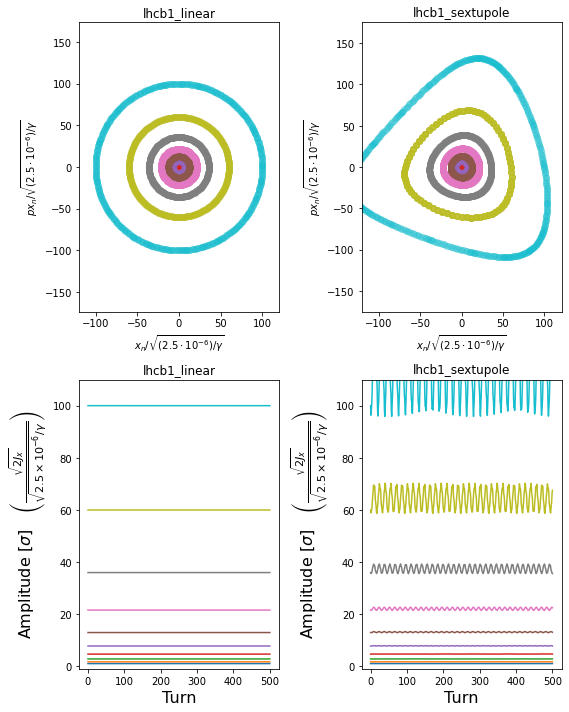

mux        muy
mqwa.a4l3.b1        64.289459  59.290825
drift_9054[0]       64.290038  59.292549
mqwa.a4l3.b1..2     64.290038  59.292549
drift_9055[0]       64.310000  59.320000
lhcb1_linearip3_p_  64.310000  59.320000

mux        muy
mqwa.a4l3.b1           64.289459  59.290825
drift_13866[0]         64.290038  59.292549
mqwa.a4l3.b1..2        64.290038  59.292549
drift_13867[0]         64.310000  59.320000
lhcb1_sextupoleip3_p_  64.310000  59.320000

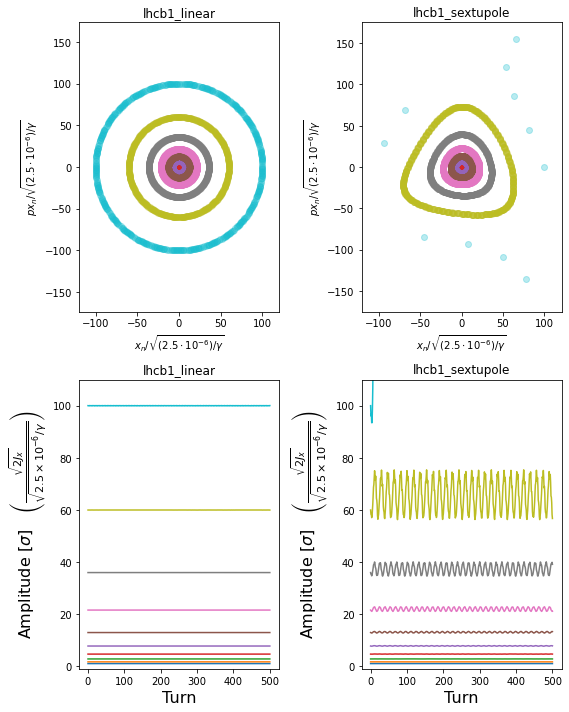

In [31]:


sequenceNames = ['lhcb1_linear','lhcb1_sextupole']


opticFiles = ['opt_1500_10000_1500_3500.madx', 
              'opt_400_10000_400_3000.madx']

for chosenOptics in tqdm(opticFiles):
    plt.close('all')
    # Importing LHC sequence :
    #===========================================
    mad = Madx()
    mad.option(echo = True, warn = True)
    for seq in sequenceNames:
        mad.call(file=f'{seq}.seq')

    # Applying optics
    #chosenOptics = opticFiles[0]
    mad.call(file='/afs/cern.ch/eng/lhc/optics/lhc_current/'+chosenOptics)
    #mad.call(file='myOptics.madx')
    
    # SETTING TRIMS TO 0:
    #arcs = [''.join(list(np.roll(range(1,9),-i)[:2].astype(str))) for i in range(0,8)]
    #kqtrims = [f'kqtf.a{arc}b1' for arc in arcs] + [f'kqtd.a{arc}b1' for arc in arcs] +[f'kqtf.a{arc}b2' for arc in arcs] + [f'kqtd.a{arc}b2' for arc in arcs]
    #for kqtrim in kqtrims:
    #    mad.globals[kqtrim] = 0
    
    # Adding beam 
    mad.command.beam(particle='proton',charge=1,npart=1,energy=7000)
    #===========================================

    plane = 'x'
    summary = pd.DataFrame()
    for seq in sequenceNames:#tqdm(sequenceNames):
        # Sending sequence to xsuite
        mad.input(f'''use, sequence = {seq}; 
                    select,flag=makethin,slice=2,range=#s/#e;
                    makethin,sequence = {seq},STYLE=teapot,MAKEDIPEDGE=True;''')

        mad.sequence[seq].use()

        mad.input(f'''  SEQEDIT, SEQUENCE={seq};
                        FLATTEN;
                            CYCLE, START=ip3;
                        FLATTEN;
                        ENDEDIT;''')

        #64.247174	59.249448
        #64.31; qy0 = 59.32
        mad.input(f'''Use, sequence={seq};
                        qx0 = 64.31; qy0 = 59.32; qprime = 15.0;
                        kqtf=kqtf.b1;kqtd=kqtd.b1;kqtf.b1:=kqtf;kqtd.b1:=kqtd;
                        match;
                        global, q1=qx0, q2=qy0;
                        vary, name=kqtf, step=1.0E-7 ;
                        vary, name=kqtd, step=1.0E-7 ;
                        lmdif, calls=100, tolerance=1.0E-21;
                        endmatch;''')
        
        
        mad.sequence[seq].use()
        mad.twiss()
        twiss = mad.table['twiss'].dframe()

        display(twiss[['mux','muy']].tail())
        
        NParticles = 1    
        coordinates = pd.DataFrame()
        for Jx_n,PT in itertools.product(*[2.5/2*np.logspace(-6,-2,10),[0]]):
            Jx = Jx_n/(1+ mad.sequence[seq].beam.energy/mad.globals.pmass)
            coordinates = pd.concat([coordinates,BP.generateCoord(Jx,twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0],NParticles,plane=plane)])

        coordinates.insert(0,'t',1.5*np.ones(len(coordinates)))

        mad.input(MADXTools.MADTrackParticles(coordinates,NTurns = int(5e2),saveFile = None,onepass='onepass'))

        tracked = mad.table['trackone'].dframe()   
        tracked.reset_index(inplace=True,drop=True)
        tracked.insert(0,'sequence',seq)
        tracked.insert(0,'ID',list(zip(tracked['sequence'],tracked['number'])))


        summary = pd.concat([summary,tracked])
        summary.reset_index(inplace=True,drop=True)





    # Plotting Normalised phase space
    LHC_1sigma =  np.sqrt(2.5e-6/(1+ mad.sequence[seq].beam.energy/mad.globals.pmass))

    fig,allaxes = plt.subplots(2,2,figsize=(8,10))
    axes = allaxes[0,:]
    for seq,ax in zip(sequenceNames,axes):
        _grouped = summary[(summary['sequence'].str.fullmatch(seq))].groupby('number')
        plt.sca(ax)
        plt.title(seq)
        for gr in list(_grouped.groups.keys()):
            x,px = np.array(_grouped.get_group(gr)[f'{plane}']),np.array(_grouped.get_group(gr)[f'p{plane}'])
            x_n,px_n = BP.normCoordinates(x,px,twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0])
            #x_n,px_n = BP.normCoordinates(x,px,SVD=True)

            plt.plot(x_n/LHC_1sigma,px_n/LHC_1sigma,'o',alpha=0.3,label=f'PT = {gr:.2e}')
        plt.xlabel(r'$x_n/\sqrt{(2.5\cdot 10^{-6})/\gamma}$')
        plt.ylabel(r'$px_n/\sqrt{(2.5\cdot 10^{-6})/\gamma}$')
        #plt.legend()
        plt.axis('equal');
        plt.xlim([-120,120])
        plt.ylim([-120,120])

    plt.tight_layout()
    #plt.savefig('oscillation_results/XPX_SPACE_'+chosenOptics.split('.madx')[0]+'.png',format='png',dpi=300)


    # Plotting increase in action
    #fig,axes = plt.subplots(1,2,figsize=(8,5))
    axes = allaxes[1,:]
    for seq,ax in zip(sequenceNames,axes):
        _grouped = summary[(summary['sequence'].str.fullmatch(seq))].groupby('number')
        plt.sca(ax)
        plt.title(seq)
        for gr in list(_grouped.groups.keys()):
            x,px = np.array(_grouped.get_group(gr)[f'{plane}']),np.array(_grouped.get_group(gr)[f'p{plane}'])
            J_x = BP.getAction(x,px,twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0])
            #J_x = BP.getAction(x,px,SVD = True)
            
            alpha,beta = twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0]
            N0 = [[1/np.sqrt(beta),0],[alpha/np.sqrt(beta), np.sqrt(beta)]]
            #print(N0)

            plt.plot(np.sqrt(2*J_x)/LHC_1sigma,label=f'ID {gr}')
        #plt.yscale('log')
        plt.xlabel(f'Turn',fontsize=16)
        plt.ylabel(r'Amplitude $[\sigma] \quad \left(\frac{\sqrt{2J_x}}{\sqrt{2.5\times 10^{-6}/\gamma}}\right)$',fontsize=16)
        #plt.legend()
        #plt.xlim([-100,100])
        plt.ylim([-1,110])

    plt.tight_layout()
    #plt.savefig('oscillation_results/tracking_'+chosenOptics.split('.madx')[0]+'.png',format='png',dpi=300)
    #plt.close('all')
    plt.pause(2)

  0%|          | 0/2 [00:00<?, ?it/s]

mux        muy
mqwa.a4l3.b1..4     64.288582  59.295634
drift_13314[0]      64.288978  59.296537
mqwa.a4l3.b1..5     64.288978  59.296537
drift_13315[0]      64.310000  59.320000
lhcb1_linearip3_p_  64.310000  59.320000

mux        muy
mqwa.a4l3.b1..4        64.288582  59.295634
drift_21334[0]         64.288978  59.296537
mqwa.a4l3.b1..5        64.288978  59.296537
drift_21335[0]         64.310000  59.320000
lhcb1_sextupoleip3_p_  64.310000  59.320000

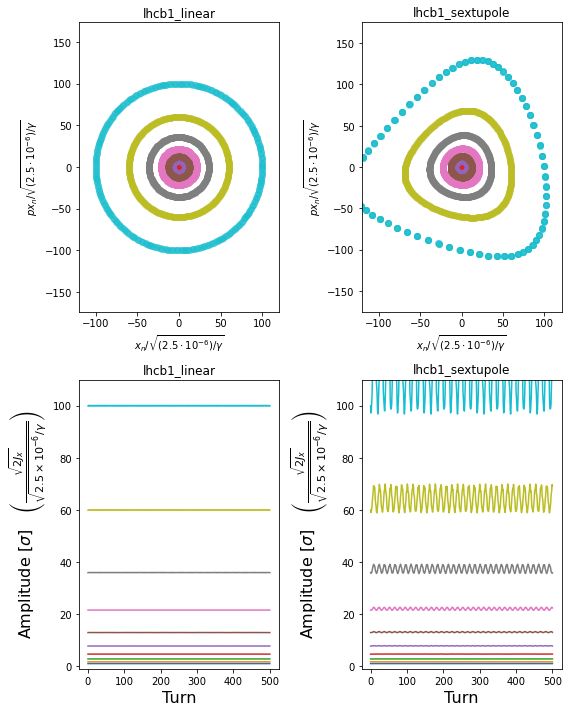

mux        muy
mqwa.a4l3.b1..4     64.288668  59.295118
drift_13314[0]      64.289062  59.296042
mqwa.a4l3.b1..5     64.289062  59.296042
drift_13315[0]      64.310000  59.320000
lhcb1_linearip3_p_  64.310000  59.320000

mux        muy
mqwa.a4l3.b1..4        64.288668  59.295118
drift_21334[0]         64.289062  59.296042
mqwa.a4l3.b1..5        64.289062  59.296042
drift_21335[0]         64.310000  59.320000
lhcb1_sextupoleip3_p_  64.310000  59.320000

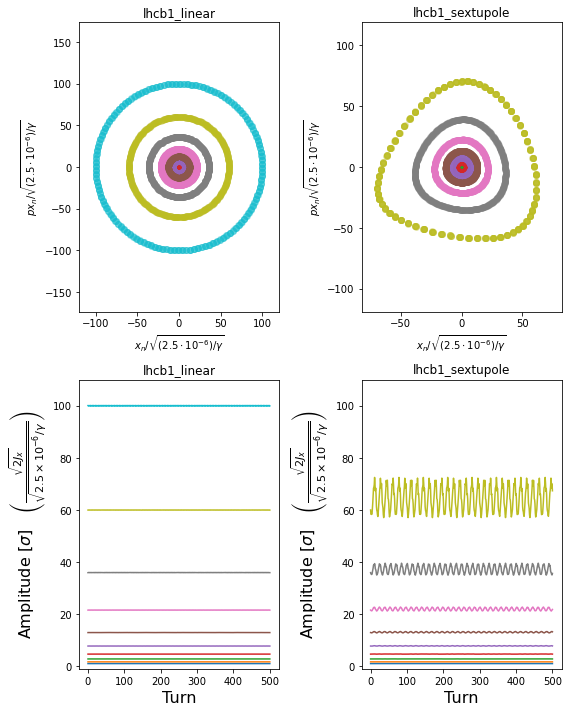

In [5]:


sequenceNames = ['lhcb1_linear','lhcb1_sextupole']


opticFiles = ['opt_1500_10000_1500_3500.madx', 
              'opt_400_10000_400_3000.madx']

for chosenOptics in tqdm(opticFiles):
    plt.close('all')
    # Importing LHC sequence :
    #===========================================
    mad = Madx()
    mad.option(echo = True, warn = True)
    for seq in sequenceNames:
        mad.call(file=f'{seq}.seq')

    # Applying optics
    #chosenOptics = opticFiles[0]
    mad.call(file='/afs/cern.ch/eng/lhc/optics/lhc_current/'+chosenOptics)
    #mad.call(file='myOptics.madx')
    
    # SETTING TRIMS TO 0:
    #arcs = [''.join(list(np.roll(range(1,9),-i)[:2].astype(str))) for i in range(0,8)]
    #kqtrims = [f'kqtf.a{arc}b1' for arc in arcs] + [f'kqtd.a{arc}b1' for arc in arcs] +[f'kqtf.a{arc}b2' for arc in arcs] + [f'kqtd.a{arc}b2' for arc in arcs]
    #for kqtrim in kqtrims:
    #    mad.globals[kqtrim] = 0
    
    # Adding beam 
    mad.command.beam(particle='proton',charge=1,npart=1,energy=7000)
    #===========================================

    plane = 'x'
    summary = pd.DataFrame()
    for seq in sequenceNames:#tqdm(sequenceNames):
        # Sending sequence to xsuite
        mad.input(f'''use, sequence = {seq}; 
                    select,flag=makethin,slice=5,range=#s/#e;
                    makethin,sequence = {seq},STYLE=teapot,MAKEDIPEDGE=True;''')

        mad.sequence[seq].use()

        mad.input(f'''  SEQEDIT, SEQUENCE={seq};
                        FLATTEN;
                            CYCLE, START=ip3;
                        FLATTEN;
                        ENDEDIT;''')

        
        mad.input(f'''Use, sequence={seq};
                        qx0 = 64.31; qy0 = 59.32; qprime = 15.0;
                        kqtf=kqtf.b1;kqtd=kqtd.b1;kqtf.b1:=kqtf;kqtd.b1:=kqtd;
                        match;
                        global, q1=qx0, q2=qy0;
                        vary, name=kqtf, step=1.0E-7 ;
                        vary, name=kqtd, step=1.0E-7 ;
                        lmdif, calls=100, tolerance=1.0E-21;
                        endmatch;''')
        
        
        mad.sequence[seq].use()
        mad.twiss()
        twiss = mad.table['twiss'].dframe()

        display(twiss[['mux','muy']].tail())
        
        NParticles = 1    
        coordinates = pd.DataFrame()
        for Jx_n,PT in itertools.product(*[2.5/2*np.logspace(-6,-2,10),[0]]):
            Jx = Jx_n/(1+ mad.sequence[seq].beam.energy/mad.globals.pmass)
            coordinates = pd.concat([coordinates,BP.generateCoord(Jx,twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0],NParticles,plane=plane)])

        coordinates.insert(0,'t',1.5*np.ones(len(coordinates)))

        mad.input(MADXTools.MADTrackParticles(coordinates,NTurns = int(5e2),saveFile = None,onepass='onepass'))

        tracked = mad.table['trackone'].dframe()   
        tracked.reset_index(inplace=True,drop=True)
        tracked.insert(0,'sequence',seq)
        tracked.insert(0,'ID',list(zip(tracked['sequence'],tracked['number'])))


        summary = pd.concat([summary,tracked])
        summary.reset_index(inplace=True,drop=True)





    # Plotting Normalised phase space
    LHC_1sigma =  np.sqrt(2.5e-6/(1+ mad.sequence[seq].beam.energy/mad.globals.pmass))

    fig,allaxes = plt.subplots(2,2,figsize=(8,10))
    axes = allaxes[0,:]
    for seq,ax in zip(sequenceNames,axes):
        _grouped = summary[(summary['sequence'].str.fullmatch(seq))].groupby('number')
        plt.sca(ax)
        plt.title(seq)
        for gr in list(_grouped.groups.keys()):
            x,px = np.array(_grouped.get_group(gr)[f'{plane}']),np.array(_grouped.get_group(gr)[f'p{plane}'])
            #x_n,px_n = BP.normCoordinates(x,px,twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0])
            x_n,px_n = BP.normCoordinates(x,px,SVD=True)

            plt.plot(x_n/LHC_1sigma,px_n/LHC_1sigma,'o',alpha=0.3,label=f'PT = {gr:.2e}')
        plt.xlabel(r'$x_n/\sqrt{(2.5\cdot 10^{-6})/\gamma}$')
        plt.ylabel(r'$px_n/\sqrt{(2.5\cdot 10^{-6})/\gamma}$')
        #plt.legend()
        plt.axis('equal');
        plt.xlim([-120,120])
        plt.ylim([-120,120])

    plt.tight_layout()
    #plt.savefig('oscillation_results/XPX_SPACE_'+chosenOptics.split('.madx')[0]+'.png',format='png',dpi=300)


    # Plotting increase in action
    #fig,axes = plt.subplots(1,2,figsize=(8,5))
    axes = allaxes[1,:]
    for seq,ax in zip(sequenceNames,axes):
        _grouped = summary[(summary['sequence'].str.fullmatch(seq))].groupby('number')
        plt.sca(ax)
        plt.title(seq)
        for gr in list(_grouped.groups.keys()):
            x,px = np.array(_grouped.get_group(gr)[f'{plane}']),np.array(_grouped.get_group(gr)[f'p{plane}'])
            #J_x = BP.getAction(x,px,twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0])
            J_x = BP.getAction(x,px,SVD = True)
            
            alpha,beta = twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0]
            N0 = [[1/np.sqrt(beta),0],[alpha/np.sqrt(beta), np.sqrt(beta)]]
            #print(N0)

            plt.plot(np.sqrt(2*J_x)/LHC_1sigma,label=f'ID {gr}')
        #plt.yscale('log')
        plt.xlabel(f'Turn',fontsize=16)
        plt.ylabel(r'Amplitude $[\sigma] \quad \left(\frac{\sqrt{2J_x}}{\sqrt{2.5\times 10^{-6}/\gamma}}\right)$',fontsize=16)
        #plt.legend()
        #plt.xlim([-100,100])
        plt.ylim([-1,110])

    plt.tight_layout()
    #plt.savefig('oscillation_results/tracking_'+chosenOptics.split('.madx')[0]+'.png',format='png',dpi=300)
    #plt.close('all')
    plt.pause(2)

In [3]:
twiss[['mux','muy']].tail()

mux        muy
mqwa.a4l3.b1           64.225773  59.219478
drift_13866[0]         64.226382  59.221260
mqwa.a4l3.b1..2        64.226382  59.221260
drift_13867[0]         64.247174  59.249448
lhcb1_sextupoleip3_p_  64.247174  59.249448

In [12]:
twiss[['mux','muy']].tail()

mux        muy
mqwa.a4l3.b1..4        64.280044  59.286389
drift_21334[0]         64.280438  59.287314
mqwa.a4l3.b1..5        64.280438  59.287314
drift_21335[0]         64.301389  59.311281
lhcb1_sextupoleip3_p_  64.301389  59.311281

In [67]:
twiss

name    keyword           s        betx  \
ip3                                ip3:1     marker      0.0000  122.565508   
drift_0[0]                     drift_0:0      drift     23.5990   39.569228   
mqwa.a4r3.b1..1        mqwa.a4r3.b1..1:1  multipole     23.5990   39.569228   
drift_1[0]                     drift_1:0      drift     24.6350   37.504395   
mqwa.a4r3.b1              mqwa.a4r3.b1:1     marker     24.6350   37.504395   
...                                  ...        ...         ...         ...   
mqwa.a4l3.b1              mqwa.a4l3.b1:1     marker  26634.2482  274.464113   
drift_9054[0]               drift_9054:0      drift  26635.2842  267.750062   
mqwa.a4l3.b1..2        mqwa.a4l3.b1..2:1  multipole  26635.2842  267.750062   
drift_9055[0]               drift_9055:0      drift  26658.8832  122.565508   
lhcb1_linearip3_p_  lhcb1_linearip3_p_:1     marker  26658.8832  122.565508   

                        alfx        mux        bety      alfy        muy  \
ip3                 2.417272   0.000000  190.903899 -2.502291   0.000000   
drift_0[0]          1.099668   0.055022  330.190458 -3.399932   0.014982   
mqwa.a4r3.b1..1     1.023341   0.055022  330.190458 -2.763009   0.014982   
drift_1[0]          0.969741   0.059303  335.943479 -2.790100   0.015477   
mqwa.a4r3.b1        0.969741   0.059303  335.943479 -2.790100   0.015477   
...                      ...        ...         ...       ...        ...   
mqwa.a4l3.b1        3.262346  64.225773   91.069563 -1.390003  59.219478   
drift_9054[0]       3.218398  64.226382   93.984206 -1.423358  59.221260   
mqwa.a4l3.b1..2     3.734876  64.226382   93.984206 -1.604650  59.221260   
drift_9055[0]       2.417272  64.247174  190.903899 -2.502291  59.249448   
lhcb1_linearip3_p_  2.417272  64.247174  190.903899 -2.502291  59.249448   

                               x  ...  sig54         sig55  sig56  sig61  \
ip3                 2.779831e-08  ...    0.0  0.000000e+00    0.0    0.0   
drift_0[0]          2.114654e-08  ...    0.0  2.470390e-18    0.0    0.0   
mqwa.a4r3.b1..1     2.114654e-08  ...    0.0  2.470390e-18    0.0    0.0   
drift_1[0]          2.089679e-08  ...    0.0  2.652081e-18    0.0    0.0   
mqwa.a4r3.b1        2.089679e-08  ...    0.0  2.652081e-18    0.0    0.0   
...                          ...  ...    ...           ...    ...    ...   
mqwa.a4l3.b1        3.467325e-08  ...    0.0  7.812698e-02    0.0    0.0   
drift_9054[0]       3.445008e-08  ...    0.0  7.812698e-02    0.0    0.0   
mqwa.a4l3.b1..2     3.445008e-08  ...    0.0  7.812698e-02    0.0    0.0   
drift_9055[0]       2.779831e-08  ...    0.0  7.812698e-02    0.0    0.0   
lhcb1_linearip3_p_  2.779831e-08  ...    0.0  7.812698e-02    0.0    0.0   

                    sig62  sig63  sig64  sig65  sig66   n1  
ip3                   0.0    0.0    0.0    0.0    0.0  0.0  
drift_0[0]            0.0    0.0    0.0    0.0    0.0  0.0  
mqwa.a4r3.b1..1       0.0    0.0    0.0    0.0    0.0  0.0  
drift_1[0]            0.0    0.0    0.0    0.0    0.0  0.0  
mqwa.a4r3.b1          0.0    0.0    0.0    0.0    0.0  0.0  
...                   ...    ...    ...    ...    ...  ...  
mqwa.a4l3.b1          0.0    0.0    0.0    0.0    0.0  0.0  
drift_9054[0]         0.0    0.0    0.0    0.0    0.0  0.0  
mqwa.a4l3.b1..2       0.0    0.0    0.0    0.0    0.0  0.0  
drift_9055[0]         0.0    0.0    0.0    0.0    0.0  0.0  
lhcb1_linearip3_p_    0.0    0.0    0.0    0.0    0.0  0.0  

[18116 rows x 256 columns]

In [68]:
def getPrefix(text):
    if 'drift' in text:
        return 'drift'
    return text.split('.')[0]

twiss.insert(0,'Prefix',twiss['name'].apply(getPrefix))
twiss

Prefix                  name    keyword  \
ip3                                ip3:1                 ip3:1     marker   
drift_0[0]                         drift             drift_0:0      drift   
mqwa.a4r3.b1..1                     mqwa     mqwa.a4r3.b1..1:1  multipole   
drift_1[0]                         drift             drift_1:0      drift   
mqwa.a4r3.b1                        mqwa        mqwa.a4r3.b1:1     marker   
...                                  ...                   ...        ...   
mqwa.a4l3.b1                        mqwa        mqwa.a4l3.b1:1     marker   
drift_9054[0]                      drift          drift_9054:0      drift   
mqwa.a4l3.b1..2                     mqwa     mqwa.a4l3.b1..2:1  multipole   
drift_9055[0]                      drift          drift_9055:0      drift   
lhcb1_linearip3_p_  lhcb1_linearip3_p_:1  lhcb1_linearip3_p_:1     marker   

                             s        betx      alfx        mux        bety  \
ip3                     0.0000  122.565508  2.417272   0.000000  190.903899   
drift_0[0]             23.5990   39.569228  1.099668   0.055022  330.190458   
mqwa.a4r3.b1..1        23.5990   39.569228  1.023341   0.055022  330.190458   
drift_1[0]             24.6350   37.504395  0.969741   0.059303  335.943479   
mqwa.a4r3.b1           24.6350   37.504395  0.969741   0.059303  335.943479   
...                        ...         ...       ...        ...         ...   
mqwa.a4l3.b1        26634.2482  274.464113  3.262346  64.225773   91.069563   
drift_9054[0]       26635.2842  267.750062  3.218398  64.226382   93.984206   
mqwa.a4l3.b1..2     26635.2842  267.750062  3.734876  64.226382   93.984206   
drift_9055[0]       26658.8832  122.565508  2.417272  64.247174  190.903899   
lhcb1_linearip3_p_  26658.8832  122.565508  2.417272  64.247174  190.903899   

                        alfy        muy  ...  sig54         sig55  sig56  \
ip3                -2.502291   0.000000  ...    0.0  0.000000e+00    0.0   
drift_0[0]         -3.399932   0.014982  ...    0.0  2.470390e-18    0.0   
mqwa.a4r3.b1..1    -2.763009   0.014982  ...    0.0  2.470390e-18    0.0   
drift_1[0]         -2.790100   0.015477  ...    0.0  2.652081e-18    0.0   
mqwa.a4r3.b1       -2.790100   0.015477  ...    0.0  2.652081e-18    0.0   
...                      ...        ...  ...    ...           ...    ...   
mqwa.a4l3.b1       -1.390003  59.219478  ...    0.0  7.812698e-02    0.0   
drift_9054[0]      -1.423358  59.221260  ...    0.0  7.812698e-02    0.0   
mqwa.a4l3.b1..2    -1.604650  59.221260  ...    0.0  7.812698e-02    0.0   
drift_9055[0]      -2.502291  59.249448  ...    0.0  7.812698e-02    0.0   
lhcb1_linearip3_p_ -2.502291  59.249448  ...    0.0  7.812698e-02    0.0   

                    sig61  sig62  sig63  sig64  sig65  sig66   n1  
ip3                   0.0    0.0    0.0    0.0    0.0    0.0  0.0  
drift_0[0]            0.0    0.0    0.0    0.0    0.0    0.0  0.0  
mqwa.a4r3.b1..1       0.0    0.0    0.0    0.0    0.0    0.0  0.0  
drift_1[0]            0.0    0.0    0.0    0.0    0.0    0.0  0.0  
mqwa.a4r3.b1          0.0    0.0    0.0    0.0    0.0    0.0  0.0  
...                   ...    ...    ...    ...    ...    ...  ...  
mqwa.a4l3.b1          0.0    0.0    0.0    0.0    0.0    0.0  0.0  
drift_9054[0]         0.0    0.0    0.0    0.0    0.0    0.0  0.0  
mqwa.a4l3.b1..2       0.0    0.0    0.0    0.0    0.0    0.0  0.0  
drift_9055[0]         0.0    0.0    0.0    0.0    0.0    0.0  0.0  
lhcb1_linearip3_p_    0.0    0.0    0.0    0.0    0.0    0.0  0.0  

[18116 rows x 257 columns]

In [69]:
twiss.groupby('Prefix').count()

name  keyword     s  betx  alfx   mux  bety  alfy   muy  \
Prefix                                                                          
acsca                    8        8     8     8     8     8     8     8     8   
drift                 9056     9056  9056  9056  9056  9056  9056  9056  9056   
e                       32       32    32    32    32    32    32    32    32   
ip1                      1        1     1     1     1     1     1     1     1   
ip1:1                    1        1     1     1     1     1     1     1     1   
ip2:1                    1        1     1     1     1     1     1     1     1   
ip3:1                    1        1     1     1     1     1     1     1     1   
ip4:1                    1        1     1     1     1     1     1     1     1   
ip5:1                    1        1     1     1     1     1     1     1     1   
ip6:1                    1        1     1     1     1     1     1     1     1   
ip7:1                    1        1     1     1     1     1     1     1     1   
ip8:1                    1        1     1     1     1     1     1     1     1   
lhcb1_linear$end:1       1        1     1     1     1     1     1     1     1   
lhcb1_linear$start:1     1        1     1     1     1     1     1     1     1   
lhcb1_linearip3_p_:1     1        1     1     1     1     1     1     1     1   
lhcinj                   1        1     1     1     1     1     1     1     1   
mb                    6160     6160  6160  6160  6160  6160  6160  6160  6160   
mbrb                    10       10    10    10    10    10    10    10    10   
mbrc                    40       40    40    40    40    40    40    40    40   
mbrs                    10       10    10    10    10    10    10    10    10   
mbw                    100      100   100   100   100   100   100   100   100   
mbx                     20       20    20    20    20    20    20    20    20   
mbxw                   120      120   120   120   120   120   120   120   120   
mq                    1176     1176  1176  1176  1176  1176  1176  1176  1176   
mqm                    114      114   114   114   114   114   114   114   114   
mqmc                    36       36    36    36    36    36    36    36    36   
mqml                   108      108   108   108   108   108   108   108   108   
mqs                     96       96    96    96    96    96    96    96    96   
mqsx                    24       24    24    24    24    24    24    24    24   
mqt                    468      468   468   468   468   468   468   468   468   
mqtlh                   72       72    72    72    72    72    72    72    72   
mqtli                  108      108   108   108   108   108   108   108   108   
mqwa                   120      120   120   120   120   120   120   120   120   
mqwb                    24       24    24    24    24    24    24    24    24   
mqxa                    48       48    48    48    48    48    48    48    48   
mqxb                    48       48    48    48    48    48    48    48    48   
mqy                     72       72    72    72    72    72    72    72    72   
msia                     1        1     1     1     1     1     1     1     1   
s                       32       32    32    32    32    32    32    32    32   

                         x  ...  sig54  sig55  sig56  sig61  sig62  sig63  \
Prefix                      ...                                             
acsca                    8  ...      8      8      8      8      8      8   
drift                 9056  ...   9056   9056   9056   9056   9056   9056   
e                       32  ...     32     32     32     32     32     32   
ip1                      1  ...      1      1      1      1      1      1   
ip1:1                    1  ...      1      1      1      1      1      1   
ip2:1                    1  ...      1      1      1      1      1      1   
ip3:1                    1  ...      1      1      1      1      1      1   
ip4:1  

In [50]:
def getTrims(text):
    if 'mqt.' in text:
        return 'MQ Trim'
    if 'mq' in text:
        return 'MQ'
    else:
        return 'other'

twiss.insert(0,'info',twiss['name'].apply(getTrims))
twiss

info                     name    keyword  \
ip1                    other                    ip1:1     marker   
drift_0[0]             other                drift_0:0      drift   
mqxa.1r1..1               MQ            mqxa.1r1..1:1  multipole   
drift_1[0]             other                drift_1:0      drift   
mqxa.1r1                  MQ               mqxa.1r1:1     marker   
...                      ...                      ...        ...   
drift_13867[0]         other            drift_13867:0      drift   
ip1.l1                 other                 ip1.l1:1     marker   
#e                     other    lhcb1_sextupole$end:1     marker   
#s                     other  lhcb1_sextupole$start:1     marker   
lhcb1_sextupoleip1_p_  other  lhcb1_sextupoleip1_p_:1     marker   

                                  s         betx       alfx        mux  \
ip1                        0.000000     0.436326  -0.041706   0.000000   
drift_0[0]                24.026667  1327.791799 -55.203389   0.240483   
mqxa.1r1..1               24.026667  1327.791799 -18.283239   0.240483   
drift_1[0]                26.150000  1406.573060 -18.819396   0.240731   
mqxa.1r1                  26.150000  1406.573060 -18.819396   0.240731   
...                             ...          ...        ...        ...   
drift_13867[0]         26658.883200     0.436326  -0.041706  64.243036   
ip1.l1                 26658.883200     0.436326  -0.041706  64.243036   
#e                     26658.883200     0.436326  -0.041706  64.243036   
#s                     26658.883200     0.436326  -0.041706  64.243036   
lhcb1_sextupoleip1_p_  26658.883200     0.436326  -0.041706  64.243036   

                              bety        alfy        muy  ...  sig54  \
ip1                       0.342339   -0.147252   0.000000  ...    0.0   
drift_0[0]             1730.264493  -71.852838   0.224516  ...    0.0   
mqxa.1r1..1            1730.264493 -119.964013   0.224516  ...    0.0   
drift_1[0]             2277.213803 -137.625929   0.224687  ...    0.0   
mqxa.1r1               2277.213803 -137.625929   0.224687  ...    0.0   
...                            ...         ...        ...  ...    ...   
drift_13867[0]            0.342339   -0.147252  59.249399  ...    0.0   
ip1.l1                    0.342339   -0.147252  59.249399  ...    0.0   
#e                        0.342339   -0.147252  59.249399  ...    0.0   
#s                        0.342339   -0.147252  59.249399  ...    0.0   
lhcb1_sextupoleip1_p_     0.342339   -0.147252  59.249399  ...    0.0   

                              sig55  sig56  sig61  sig62  sig63  sig64  sig65  \
ip1                    0.000000e+00    0.0    0.0    0.0    0.0    0.0    0.0   
drift_0[0]             5.088263e-14    0.0    0.0    0.0    0.0    0.0    0.0   
mqxa.1r1..1            5.088263e-14    0.0    0.0    0.0    0.0    0.0    0.0   
drift_1[0]             5.187496e-14    0.0    0.0    0.0    0.0    0.0    0.0   
mqxa.1r1               5.187496e-14    0.0    0.0    0.0    0.0    0.0    0.0   
...                             ...    ...    ...    ...    ...    ...    ...   
drift_13867[0]         2.711251e-07    0.0    0.0    0.0    0.0    0.0    0.0   
ip1.l1                 2.711251e-07    0.0    0.0    0.0    0.0    0.0    0.0   
#e                     2.711251e-07    0.0    0.0    0.0    0.0    0.0    0.0   
#s                     2.711251e-07    0.0    0.0    0.0    0.0    0.0    0.0   
lhcb1_sextupoleip1_p_  2.711251e-07    0.0    0.0    0.0    0.0    0.0    0.0   

                       sig66   n1  
ip1                      0.0  0.0  
drift_0[0]               0.0  0.0  
mqxa.1r1..1              0.0  0.0  
drift_1[0]               0.0  0.0  
mqxa.1r1                 0.0  0.0  
...                      ...  ...  
drift_13867[0]           0.0  0.0  
ip1.l1                   0.0  0.0  
#e                       0.0  0.0  
#s                       0.0  0.0  
lhcb1_sextupoleip1_p_    0.0  0.0  

[27740 rows x 257 columns]

In [52]:
for el in twiss.groupby('info').get_group('MQ Trim').index:
    print(mad.elements[el])

mqt.12r1.b1..1: mqt..1, kmax=123.0, kmin=-123.0, calib=0.22363636363636363, polarity=-1.0, lrad=0.16, knl={0.0,0.00022992982169282747,0.0,0.0}, mech_sep=0.194;
mqt.12r1.b1: marker, kmax=123.0, kmin=-123.0, calib=0.22363636363636363, polarity=-1.0, mech_sep=0.194;
mqt.12r1.b1..2: mqt..2, kmax=123.0, kmin=-123.0, calib=0.22363636363636363, polarity=-1.0, lrad=0.16, knl={0.0,0.00022992982169282747,0.0,0.0}, mech_sep=0.194;
mqt.13r1.b1..1: mqt..1, kmax=123.0, kmin=-123.0, calib=0.22363636363636363, polarity=1.0, lrad=0.16, knl={0.0,-3.279396750269465e-05,0.0,0.0}, mech_sep=0.194;
mqt.13r1.b1: marker, kmax=123.0, kmin=-123.0, calib=0.22363636363636363, polarity=1.0, mech_sep=0.194;
mqt.13r1.b1..2: mqt..2, kmax=123.0, kmin=-123.0, calib=0.22363636363636363, polarity=1.0, lrad=0.16, knl={0.0,-3.279396750269465e-05,0.0,0.0}, mech_sep=0.194;
mqt.14r1.b1..1: mqt..1, kmax=123.0, kmin=-123.0, calib=0.22363636363636363, polarity=-1.0, lrad=0.16, knl={0.0,0.0,0.0,0.0}, mech_sep=0.194;
mqt.14r1.b1: m

In [42]:


arcs = [''.join(list(np.roll(range(1,9),-i)[:2].astype(str))) for i in range(0,8)]
kqtrims = [f'kqtf.a{arc}b1' for arc in arcs] + [f'kqtd.a{arc}b1' for arc in arcs] +[f'kqtf.a{arc}b2' for arc in arcs] + [f'kqtd.a{arc}b2' for arc in arcs]


['kqtf.a12b1',
 'kqtf.a23b1',
 'kqtf.a34b1',
 'kqtf.a45b1',
 'kqtf.a56b1',
 'kqtf.a67b1',
 'kqtf.a78b1',
 'kqtf.a81b1',
 'kqtd.a12b1',
 'kqtd.a23b1',
 'kqtd.a34b1',
 'kqtd.a45b1',
 'kqtd.a56b1',
 'kqtd.a67b1',
 'kqtd.a78b1',
 'kqtd.a81b1',
 'kqtf.a12b2',
 'kqtf.a23b2',
 'kqtf.a34b2',
 'kqtf.a45b2',
 'kqtf.a56b2',
 'kqtf.a67b2',
 'kqtf.a78b2',
 'kqtf.a81b2',
 'kqtd.a12b2',
 'kqtd.a23b2',
 'kqtd.a34b2',
 'kqtd.a45b2',
 'kqtd.a56b2',
 'kqtd.a67b2',
 'kqtd.a78b2',
 'kqtd.a81b2']

In [47]:
for kqtrim in kqtrims:
    #mad.globals[kqtrim] = 0
    print(mad.globals[kqtrim])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


'81'

In [ ]:
kqtf.b1    =      0.000000000000000000000000 ;
kqtd.b1    =      0.000000000000000000000000 ;
kqtf.b2    =      0.000000000000000000000000 ;
kqtd.b2    =      0.000000000000000000000000 ;
kqtf.a12b1 :=     0.000000000000000000000000 + kqtf.b1;
kqtf.a23b1 :=     0.000000000000000000000000 + kqtf.b1;
kqtf.a34b1 :=     0.000000000000000000000000 + kqtf.b1;
kqtf.a45b1 :=     0.000000000000000000000000 + kqtf.b1;
kqtf.a56b1 :=     0.000245382646382082071548 + kqtf.b1;
kqtf.a67b1 :=     0.000000000000000000000000 + kqtf.b1;
kqtf.a78b1 :=     0.000000000000000000000000 + kqtf.b1;
kqtf.a81b1 :=    -0.000268997715660814829593 + kqtf.b1;
kqtf.a12b2 :=     0.000000000000000000000000 + kqtf.b2;
kqtf.a23b2 :=     0.000000000000000000000000 + kqtf.b2;
kqtf.a34b2 :=     0.000000000000000000000000 + kqtf.b2;
kqtf.a45b2 :=     0.000000000000000000000000 + kqtf.b2;
kqtf.a56b2 :=    -0.000294496286808662100301 + kqtf.b2;
kqtf.a67b2 :=     0.000000000000000000000000 + kqtf.b2;
kqtf.a78b2 :=     0.000000000000000000000000 + kqtf.b2;
kqtf.a81b2 :=     0.000122519791640002327464 + kqtf.b2;
kqtd.a12b1 :=     0.000000000000000000000000 + kqtd.b1;
kqtd.a23b1 :=     0.000000000000000000000000 + kqtd.b1;
kqtd.a34b1 :=     0.000000000000000000000000 + kqtd.b1;
kqtd.a45b1 :=     0.000000000000000000000000 + kqtd.b1;
kqtd.a56b1 :=    -0.000046663851850957696295 + kqtd.b1;
kqtd.a67b1 :=     0.000000000000000000000000 + kqtd.b1;
kqtd.a78b1 :=     0.000000000000000000000000 + kqtd.b1;
kqtd.a81b1 :=     0.000024799833039502790520 + kqtd.b1;
kqtd.a12b2 :=     0.000000000000000000000000 + kqtd.b2;
kqtd.a23b2 :=     0.000000000000000000000000 + kqtd.b2;
kqtd.a34b2 :=     0.000000000000000000000000 + kqtd.b2;
kqtd.a45b2 :=     0.000000000000000000000000 + kqtd.b2;
kqtd.a56b2 :=     0.000059326479393278154127 + kqtd.b2;
kqtd.a67b2 :=     0.000000000000000000000000 + kqtd.b2;
kqtd.a78b2 :=     0.000000000000000000000000 + kqtd.b2;
kqtd.a81b2 :=    -0.000021009298594504317853 + kqtd.b2;



!*** main trim quadrupoles ***
kqtf.b1    =      0.000000000000000000000000 ;
kqtd.b1    =      0.000000000000000000000000 ;
kqtf.b2    =      0.000000000000000000000000 ;
kqtd.b2    =      0.000000000000000000000000 ;
kqtf.a12b1 :=  kqtf.b1;
kqtd.a12b1 :=  kqtd.b1;
kqtf.a23b1 :=  kqtf.b1;
kqtd.a23b1 :=  kqtd.b1;
kqtf.a34b1 :=  kqtf.b1;
kqtd.a34b1 :=  kqtd.b1;
kqtf.a45b1 :=  kqtf.b1;
kqtd.a45b1 :=  kqtd.b1;
kqtf.a56b1 :=  kqtf.b1;
kqtd.a56b1 :=  kqtd.b1;
kqtf.a67b1 :=  kqtf.b1;
kqtd.a67b1 :=  kqtd.b1;
kqtf.a78b1 :=  kqtf.b1;
kqtd.a78b1 :=  kqtd.b1;
kqtf.a81b1 :=  kqtf.b1;
kqtd.a81b1 :=  kqtd.b1;
kqtf.a12b2 :=  kqtf.b2;
kqtd.a12b2 :=  kqtd.b2;
kqtf.a23b2 :=  kqtf.b2;
kqtd.a23b2 :=  kqtd.b2;
kqtf.a34b2 :=  kqtf.b2;
kqtd.a34b2 :=  kqtd.b2;
kqtf.a45b2 :=  kqtf.b2;
kqtd.a45b2 :=  kqtd.b2;
kqtf.a56b2 :=  kqtf.b2;
kqtd.a56b2 :=  kqtd.b2;
kqtf.a67b2 :=  kqtf.b2;
kqtd.a67b2 :=  kqtd.b2;
kqtf.a78b2 :=  kqtf.b2;
kqtd.a78b2 :=  kqtd.b2;
kqtf.a81b2 :=  kqtf.b2;
kqtd.a81b2 :=  kqtd.b2;



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
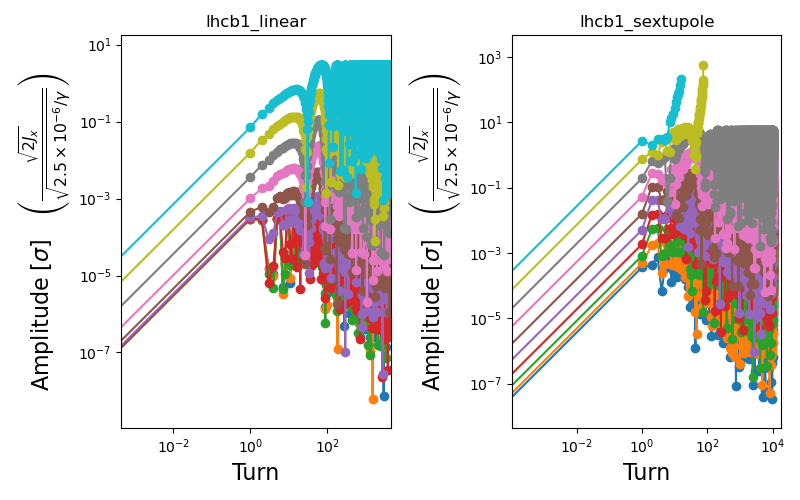

In [57]:
# Plotting increase in action
fig,axes = plt.subplots(1,2,figsize=(8,5))
for seq,ax in zip(sequenceNames,axes):
    _grouped = summary[(summary['sequence'].str.fullmatch(seq))].groupby('number')
    plt.sca(ax)
    plt.title(seq)
    for gr in list(_grouped.groups.keys()):
        x,px = np.array(_grouped.get_group(gr)[f'{plane}']),np.array(_grouped.get_group(gr)[f'p{plane}'])
        J_x = BP.getAction(x,px,twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0])
        #J_x = BP.getAction(x,px,SVD = True)
        amplitude = np.sqrt(2*J_x)/LHC_1sigma
        plt.plot(np.abs(amplitude-amplitude[0]),'-o',label=f'ID {gr}')
    #plt.yscale('log')
    plt.xlabel(f'Turn',fontsize=16)
    plt.ylabel(r'Amplitude $[\sigma] \quad \left(\frac{\sqrt{2J_x}}{\sqrt{2.5\times 10^{-6}/\gamma}}\right)$',fontsize=16)
    plt.yscale('log')
    plt.xscale('log')
    plt.axis('equal')
    #plt.legend()
    plt.xlim([1e-1,2e1])
    #plt.ylim([-1,110])
    
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
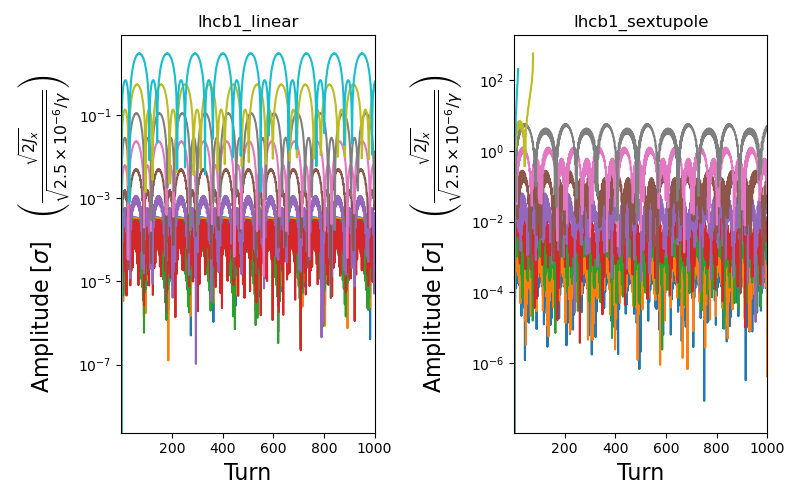

In [54]:
# Plotting increase in action
fig,axes = plt.subplots(1,2,figsize=(8,5))
for seq,ax in zip(sequenceNames,axes):
    _grouped = summary[(summary['sequence'].str.fullmatch(seq))].groupby('number')
    plt.sca(ax)
    plt.title(seq)
    for gr in list(_grouped.groups.keys()):
        x,px = np.array(_grouped.get_group(gr)[f'{plane}']),np.array(_grouped.get_group(gr)[f'p{plane}'])
        J_x = BP.getAction(x,px,twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0])
        #J_x = BP.getAction(x,px,SVD = True)
        amplitude = np.sqrt(2*J_x)/LHC_1sigma
        plt.plot(np.abs(amplitude-amplitude[0]),label=f'ID {gr}')
    #plt.yscale('log')
    plt.xlabel(f'Turn',fontsize=16)
    plt.ylabel(r'Amplitude $[\sigma] \quad \left(\frac{\sqrt{2J_x}}{\sqrt{2.5\times 10^{-6}/\gamma}}\right)$',fontsize=16)
    plt.yscale('log')
    #plt.xscale('log')
    #plt.axis('equal')
    #plt.legend()
    plt.xlim([1e-1,1e3])
    #plt.ylim([-1,110])
    
plt.tight_layout()

# Comparing SVD and Twiss alpha,beta

TWISS Values: 2.417272074826705 122.56548904350697
(2.4204970569536663, 122.62056079634095)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
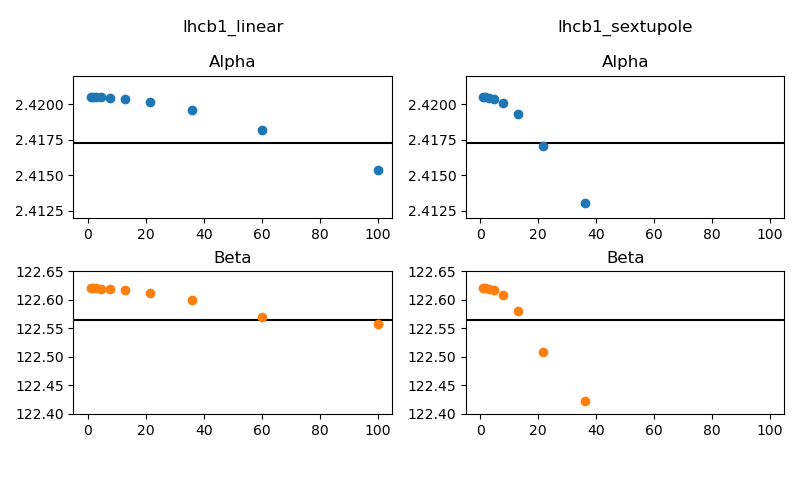

In [34]:

%matplotlib widget
gr = 1

x,px = np.array(_grouped.get_group(gr)[f'{plane}']),np.array(_grouped.get_group(gr)[f'p{plane}'])

print('TWISS Values:',twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0])
print(BP.computeAlphaBeta(x,px))

# Plotting increase in action
fig,axes = plt.subplots(1,2,figsize=(8,5))
for seq,ax in zip(sequenceNames,axes):
    _grouped = summary[(summary['sequence'].str.fullmatch(seq))].groupby('number')
    plt.sca(ax)
    plt.title(seq+'\n\n')
    
    plt.axis('off')
    axtop = ax.inset_axes([0, 0.75, 1,0.4])
    axbottom = ax.inset_axes([0, 0.2, 1,0.4])
    
    axtop.set_title('Alpha')
    axtop.axhline(twiss[f'alf{plane}'][0],color='k')
    axbottom.set_title('Beta')
    axbottom.axhline(twiss[f'bet{plane}'][0],color='k')
        
    for gr in list(_grouped.groups.keys()):
        x,px = np.array(_grouped.get_group(gr)[f'{plane}']),np.array(_grouped.get_group(gr)[f'p{plane}'])
        
        alpha,beta = BP.computeAlphaBeta(x,px)
        J_x = BP.getAction(x,px,SVD = True)
        amplitude = np.sqrt(2*J_x)/LHC_1sigma
        
        axtop.plot([amplitude[0]],[alpha],'o',color='C0')
        axbottom.plot([amplitude[0]],[beta],'o',color='C1')
        
        
    #plt.yscale('log')
    plt.xlabel(f'Turn',fontsize=16)
    plt.ylabel(r'Amplitude $[\sigma] \quad \left(\frac{\sqrt{2J_x}}{\sqrt{2.5\times 10^{-6}/\gamma}}\right)$',fontsize=16)
    
    axtop.set_ylim([2.412,2.422])
    axtop.set_xlim([-5,105])
    axbottom.set_ylim([122.4,122.65])
    axbottom.set_xlim([-5,105])
    #plt.legend()
    #plt.xlim([-100,100])
    #plt.ylim([-1,110])
    
plt.tight_layout()



TWISS Values: 2.417272074826705 122.56548904350697
(2.4182114516736664, 122.59176936260292)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
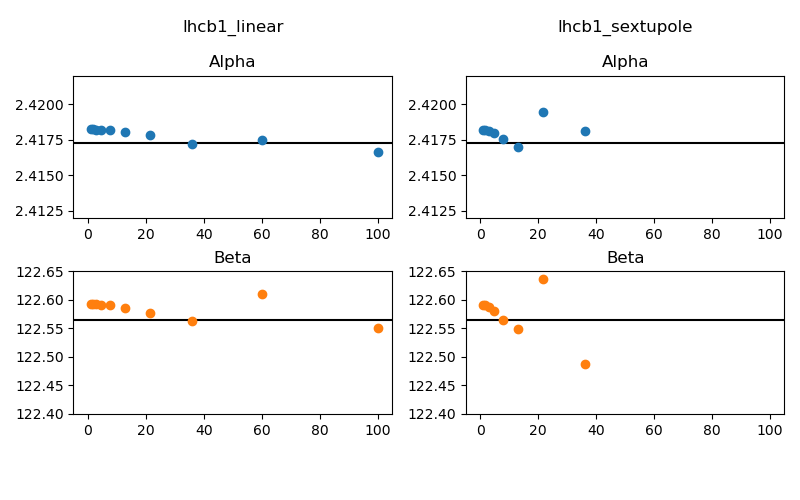

In [36]:

%matplotlib widget
gr = 1

x,px = np.array(_grouped.get_group(gr)[f'{plane}']),np.array(_grouped.get_group(gr)[f'p{plane}'])

print('TWISS Values:',twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0])
print(BP.computeAlphaBeta(x,px))

# Plotting increase in action
fig,axes = plt.subplots(1,2,figsize=(8,5))
for seq,ax in zip(sequenceNames,axes):
    _grouped = summary[(summary['sequence'].str.fullmatch(seq))].groupby('number')
    plt.sca(ax)
    plt.title(seq+'\n\n')
    
    plt.axis('off')
    axtop = ax.inset_axes([0, 0.75, 1,0.4])
    axbottom = ax.inset_axes([0, 0.2, 1,0.4])
    
    axtop.set_title('Alpha')
    axtop.axhline(twiss[f'alf{plane}'][0],color='k')
    axbottom.set_title('Beta')
    axbottom.axhline(twiss[f'bet{plane}'][0],color='k')
        
    for gr in list(_grouped.groups.keys()):
        x,px = np.array(_grouped.get_group(gr)[f'{plane}']),np.array(_grouped.get_group(gr)[f'p{plane}'])
        
        alpha,beta = BP.computeAlphaBeta(x,px)
        J_x = BP.getAction(x,px,SVD = True)
        amplitude = np.sqrt(2*J_x)/LHC_1sigma
        
        axtop.plot([amplitude[0]],[alpha],'o',color='C0')
        axbottom.plot([amplitude[0]],[beta],'o',color='C1')
        
        
    #plt.yscale('log')
    plt.xlabel(f'Turn',fontsize=16)
    plt.ylabel(r'Amplitude $[\sigma] \quad \left(\frac{\sqrt{2J_x}}{\sqrt{2.5\times 10^{-6}/\gamma}}\right)$',fontsize=16)
    
    axtop.set_ylim([2.412,2.422])
    axtop.set_xlim([-5,105])
    axbottom.set_ylim([122.4,122.65])
    axbottom.set_xlim([-5,105])
    #plt.legend()
    #plt.xlim([-100,100])
    #plt.ylim([-1,110])
    
plt.tight_layout()



TWISS Values: 2.417272074826705 122.56548904350697
(2.417276089689751, 122.56535744604926)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
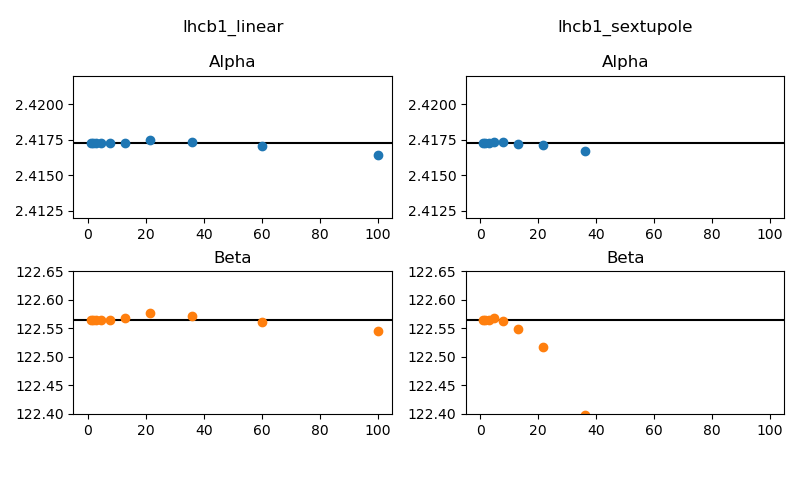

In [38]:

%matplotlib widget
gr = 1

x,px = np.array(_grouped.get_group(gr)[f'{plane}']),np.array(_grouped.get_group(gr)[f'p{plane}'])

print('TWISS Values:',twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0])
print(BP.computeAlphaBeta(x,px))

# Plotting increase in action
fig,axes = plt.subplots(1,2,figsize=(8,5))
for seq,ax in zip(sequenceNames,axes):
    _grouped = summary[(summary['sequence'].str.fullmatch(seq))].groupby('number')
    plt.sca(ax)
    plt.title(seq+'\n\n')
    
    plt.axis('off')
    axtop = ax.inset_axes([0, 0.75, 1,0.4])
    axbottom = ax.inset_axes([0, 0.2, 1,0.4])
    
    axtop.set_title('Alpha')
    axtop.axhline(twiss[f'alf{plane}'][0],color='k')
    axbottom.set_title('Beta')
    axbottom.axhline(twiss[f'bet{plane}'][0],color='k')
        
    for gr in list(_grouped.groups.keys()):
        x,px = np.array(_grouped.get_group(gr)[f'{plane}']),np.array(_grouped.get_group(gr)[f'p{plane}'])
        
        alpha,beta = BP.computeAlphaBeta(x,px)
        J_x = BP.getAction(x,px,SVD = True)
        amplitude = np.sqrt(2*J_x)/LHC_1sigma
        
        axtop.plot([amplitude[0]],[alpha],'o',color='C0')
        axbottom.plot([amplitude[0]],[beta],'o',color='C1')
        
        
    #plt.yscale('log')
    plt.xlabel(f'Turn',fontsize=16)
    plt.ylabel(r'Amplitude $[\sigma] \quad \left(\frac{\sqrt{2J_x}}{\sqrt{2.5\times 10^{-6}/\gamma}}\right)$',fontsize=16)
    
    axtop.set_ylim([2.412,2.422])
    axtop.set_xlim([-5,105])
    axbottom.set_ylim([122.4,122.65])
    axbottom.set_xlim([-5,105])
    #plt.legend()
    #plt.xlim([-100,100])
    #plt.ylim([-1,110])
    
plt.tight_layout()



In [91]:
twiss[:3].index

Index(['ip3', 'drift_0[0]', 'mqwa.a4r3.b1..1'], dtype='object')

In [93]:
twiss.index

Index(['ip3', 'drift_0[0]', 'mqwa.a4r3.b1..1', 'drift_1[0]', 'mqwa.a4r3.b1',
       'drift_2[0]', 'mqwa.a4r3.b1..2', 'drift_3[0]', 'mqwa.b4r3.b1..1',
       'drift_4[0]',
       ...
       'drift_11279[0]', 'mqwa.b4l3.b1..2', 'drift_11280[0]',
       'mqwa.a4l3.b1..1', 'drift_11281[0]', 'mqwa.a4l3.b1', 'drift_11282[0]',
       'mqwa.a4l3.b1..2', 'drift_11283[0]', 'lhcb1_sextupoleip3_p_'],
      dtype='object', length=22572)

In [103]:
test = mad.elements['mqwa.b4l3.b1..2']
str(test)

'mqwa.b4l3.b1..2: mqwa..2, kmax=35.0, kmin=1.873, calib=0.04929577464788732, polarity=1.0, lrad=1.554, knl={0.0,0.0019289553360000002,0.0,0.0}, mech_sep=-0.224;'

In [108]:


knl = []

for name in twiss.index:
    if 'drift' in name:
        continue
    
    definition = mad.elements[name]
    if 'knl' in str(definition):
        knl.append(definition.knl)


In [116]:
np.sum(np.array(knl)[:,3])

0.2990378959322434

TWISS Values: 2.417272074826705 122.56548904350697
(2.417276089689751, 122.56535744604926)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
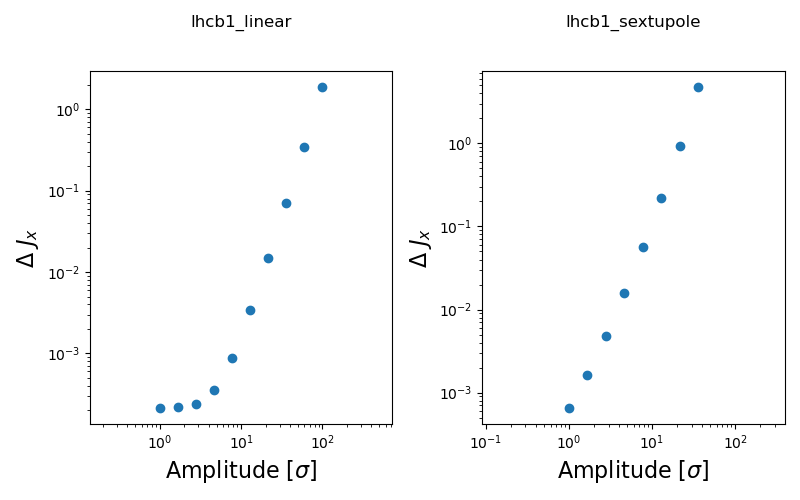

In [72]:

%matplotlib widget
gr = 1

x,px = np.array(_grouped.get_group(gr)[f'{plane}']),np.array(_grouped.get_group(gr)[f'p{plane}'])

print('TWISS Values:',twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0])
print(BP.computeAlphaBeta(x,px))

# Plotting increase in action
fig,axes = plt.subplots(1,2,figsize=(8,5))
for seq,ax in zip(sequenceNames,axes):
    _grouped = summary[(summary['sequence'].str.fullmatch(seq))].groupby('number')
    plt.sca(ax)
    plt.title(seq+'\n\n')
    

    for gr in list(_grouped.groups.keys()):
        x,px = np.array(_grouped.get_group(gr)[f'{plane}']),np.array(_grouped.get_group(gr)[f'p{plane}'])
        
        #alpha,beta = BP.computeAlphaBeta(x,px)
        #J_x = BP.getAction(x,px,SVD = True)
        J_x = BP.getAction(x,px,twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0])
        
        amplitude = np.sqrt(2*J_x)/LHC_1sigma
        wave_amp = np.max(amplitude-np.mean(amplitude))#/np.mean(amplitude)
        
        plt.plot([amplitude[0]],[wave_amp],'o',color='C0')
        #axbottom.plot([amplitude[0]],[wave_amp],'o',color='C1')
        
        
    #plt.yscale('log')
    plt.xlabel(r'Amplitude [$\sigma$]',fontsize=16)
    plt.ylabel(r'$\Delta\ J_x$',fontsize=16)
    
    #axtop.set_ylim([2.412,2.422])
    #axtop.set_xlim([-5,105])
    plt.axis('equal')
    plt.yscale('log')
    plt.xscale('log')#axbottom.set_ylim([122.4,122.65])
    #axbottom.set_xlim([-5,105])
    #plt.legend()
    #plt.xlim([-100,100])
    #plt.ylim([-1,110])
    
plt.tight_layout()



In [61]:
twiss['k2l']

ip3                      0.0
drift_0[0]               0.0
mqwa.a4r3.b1..1          0.0
drift_1[0]               0.0
mqwa.a4r3.b1             0.0
                        ... 
mqwa.a4l3.b1             0.0
drift_13866[0]           0.0
mqwa.a4l3.b1..2          0.0
drift_13867[0]           0.0
lhcb1_sextupoleip3_p_    0.0
Name: k2l, Length: 27740, dtype: float64

In [27]:
gr = 8

x,px = np.array(_grouped.get_group(gr)[f'{plane}']),np.array(_grouped.get_group(gr)[f'p{plane}'])
print('TWISS Values:',twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0])
print(BP.computeAlphaBeta(x,px))

TWISS Values: 2.417272074826705 122.56548904350697
(2.413025277413362, 122.42254374030834)


In [15]:
twiss[['alfx','betx']][-10:]

alfx        betx
drift_13863[0]         2.255651  290.912376
mqwa.b4l3.b1..2        2.816808  290.912376
drift_13864[0]         2.763738  281.269194
mqwa.a4l3.b1..1        3.306293  281.269194
drift_13865[0]         3.262346  274.464084
mqwa.a4l3.b1           3.262346  274.464084
drift_13866[0]         3.218398  267.750033
mqwa.a4l3.b1..2        3.734876  267.750033
drift_13867[0]         2.417272  122.565489
lhcb1_sextupoleip3_p_  2.417272  122.565489

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
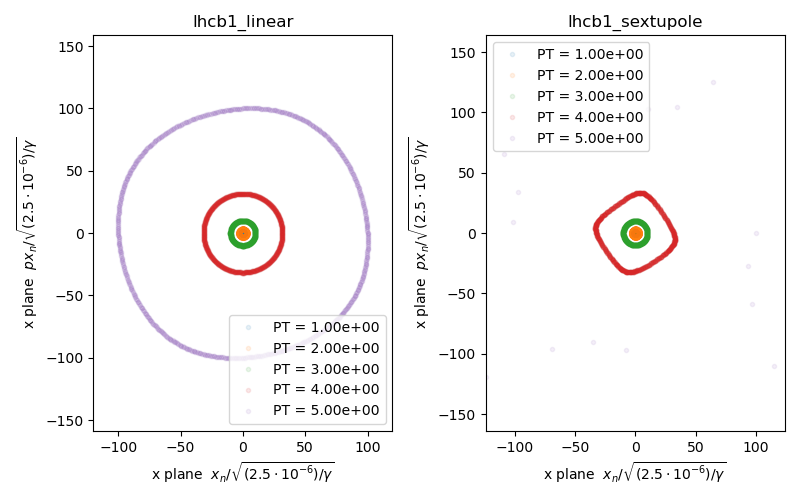

In [15]:
# Plotting Normalised phase space
%matplotlib widget
LHC_1sigma =  np.sqrt(2.5e-6/(1+ mad.sequence[seq].beam.energy/mad.globals.pmass))

fig,axes = plt.subplots(1,2,figsize=(8,5))
for seq,ax in zip(sequenceNames,axes):
    _grouped = summary[(summary['sequence'].str.fullmatch(seq))].groupby('number')
    plt.sca(ax)
    plt.title(seq)
    for gr in list(_grouped.groups.keys()):
        x,px = np.array(_grouped.get_group(gr)[f'{plane}']),np.array(_grouped.get_group(gr)[f'p{plane}'])
        x_n,px_n = BP.normCoordinates(x,px,twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0])
        
        plt.plot(x_n/LHC_1sigma,px_n/LHC_1sigma,'.',alpha=0.1,label=f'PT = {gr:.2e}')
    plt.xlabel(f'{plane} plane  '+r'$x_n/\sqrt{(2.5\cdot 10^{-6})/\gamma}$')
    plt.ylabel(f'{plane} plane  '+r'$px_n/\sqrt{(2.5\cdot 10^{-6})/\gamma}$')
    plt.legend()
    plt.axis('equal');
    plt.xlim([-120,120])
    plt.ylim([-120,120])
    
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
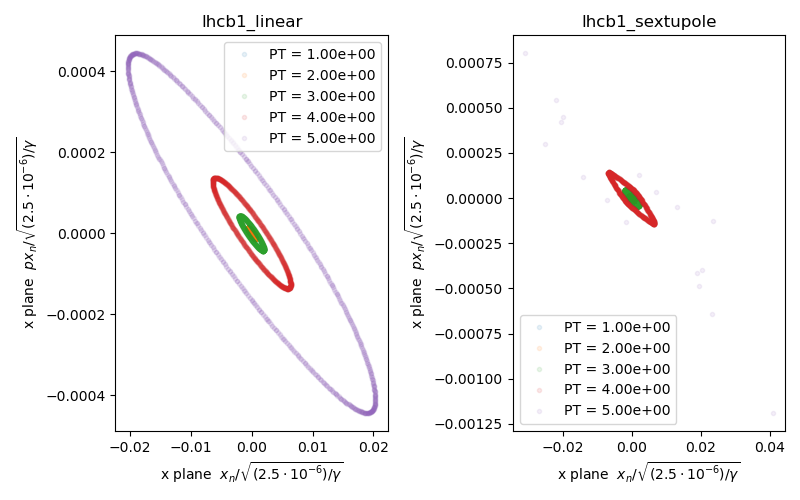

In [18]:
%matplotlib widget
LHC_1sigma =  np.sqrt(2.5e-6/(1+ mad.sequence[seq].beam.energy/mad.globals.pmass))

fig,axes = plt.subplots(1,2,figsize=(8,5))
for seq,ax in zip(sequenceNames,axes):
    _grouped = summary[(summary['sequence'].str.fullmatch(seq))].groupby('number')
    plt.sca(ax)
    plt.title(seq)
    for gr in list(_grouped.groups.keys()):
        x,px = np.array(_grouped.get_group(gr)[f'{plane}']),np.array(_grouped.get_group(gr)[f'p{plane}'])
        x_n,px_n = BP.normCoordinates(x,px,twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0])
        
        plt.plot(x,px,'.',alpha=0.1,label=f'PT = {gr:.2e}')
    plt.xlabel(f'{plane} plane  '+r'$x_n/\sqrt{(2.5\cdot 10^{-6})/\gamma}$')
    plt.ylabel(f'{plane} plane  '+r'$px_n/\sqrt{(2.5\cdot 10^{-6})/\gamma}$')
    plt.legend()
    #plt.axis('equal');
    #plt.xlim([-120,120])
    #plt.ylim([-120,120])
    
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
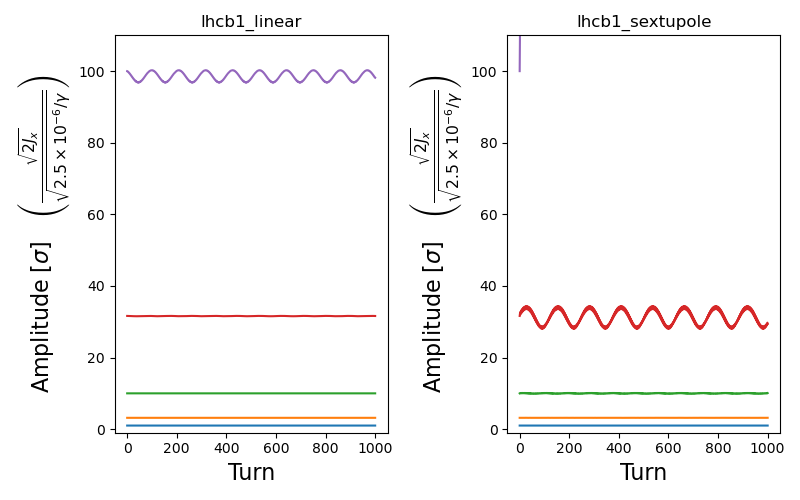

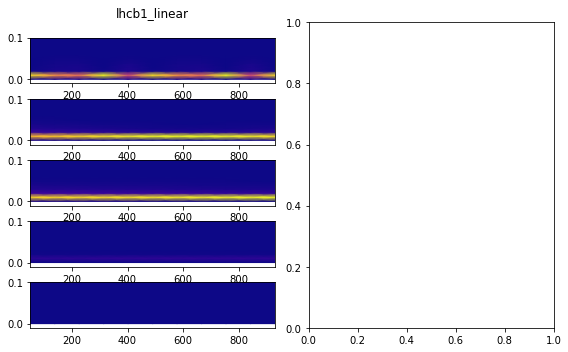

In [20]:
from scipy import signal
from scipy.fft import fftshift

#sequenceNames
fig,axes = plt.subplots(1,2,figsize=(8,5))
for seq,ax in zip(sequenceNames[:1],axes):
    _grouped = summary[(summary['sequence'].str.fullmatch(seq))].groupby('number')
    plt.sca(ax)
    plt.title(seq)
    
    y0 = 0
    plt.axis('off')
    for gr in list(_grouped.groups.keys()):
        #x,px = np.array(_grouped.get_group(gr)[f'{plane}']),np.array(_grouped.get_group(gr)[f'p{plane}'])
        J_x = BP.getAction(x,px,twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0])
        
        axin = ax.inset_axes([0, y0, 1,0.15])
        y0 += 1/len(list(_grouped.groups.keys()))

        x,px,time = _grouped.get_group(gr)[['x','px','turn']].T.values
        J_x = BP.getAction(x,px,twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0])
        
        f, t, Sxx = signal.spectrogram(J_x, fs=1,nperseg=100)
        
        axin.pcolormesh(t, f, Sxx,  cmap='plasma', shading='gouraud')
        axin.set_ylim([-0.01,0.1])

        
    #plt.yscale('log')
    plt.xlabel(f'{plane} plane  '+r'Turn')
    plt.ylabel(f'{plane} plane  '+r'$J_x$')

    #plt.xlim([-100,100])
    #plt.ylim([-100,100])
    
plt.tight_layout()

(0.0, 0.05)

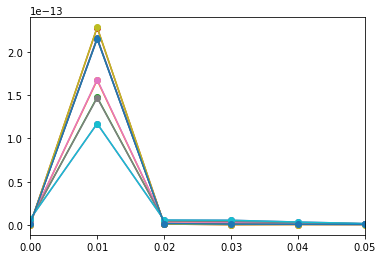

In [31]:
plt.figure()
plt.plot(f,Sxx[:,:],'-o')
plt.xlim([0,0.05])

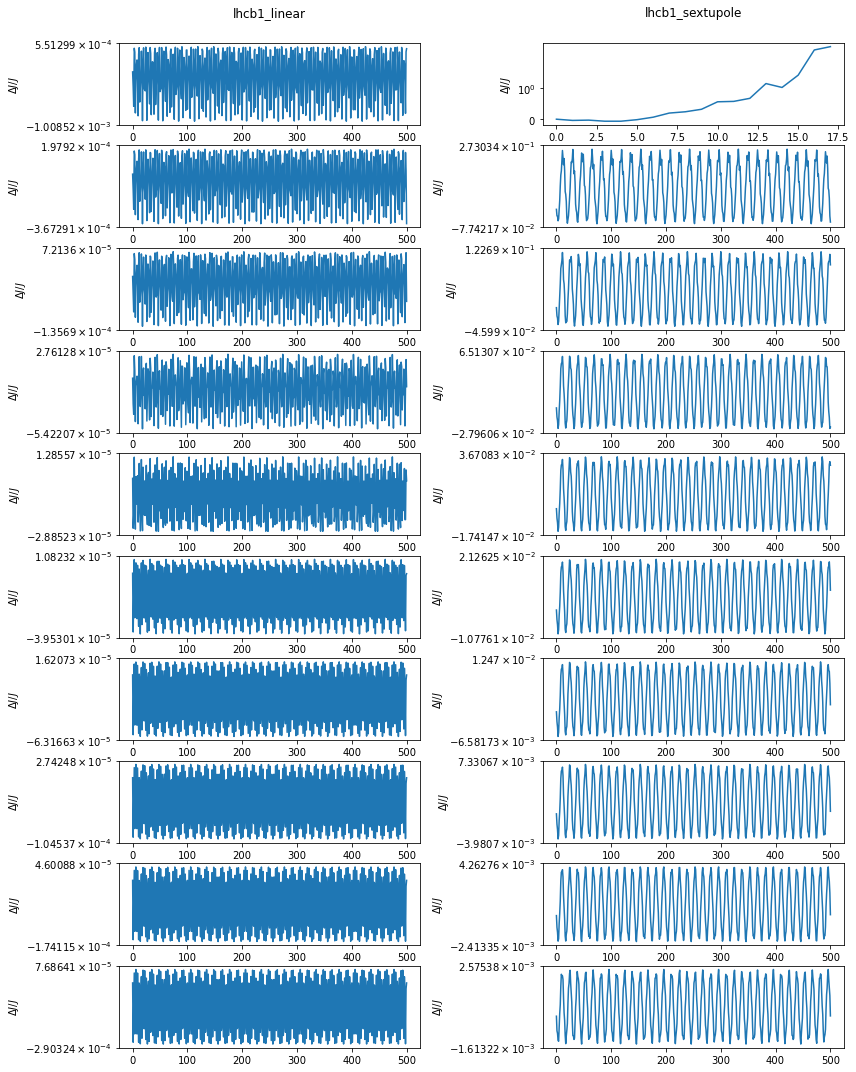

In [21]:
# Plotting increase in action
fig,axes = plt.subplots(1,2,figsize=(12,15))
for seq,ax in zip(sequenceNames,axes):
    _grouped = summary[(summary['sequence'].str.fullmatch(seq))].groupby('number')
    plt.sca(ax)
    plt.title(seq)
    
    y0 = 0
    plt.axis('off')
    #plt
    for gr in list(_grouped.groups.keys()):
        x,px = np.array(_grouped.get_group(gr)[f'{plane}']),np.array(_grouped.get_group(gr)[f'p{plane}'])
        J_x = BP.getAction(x,px,twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0])
        
        axin = ax.inset_axes([0, y0, 1,0.08])
        y0 += 1/(len(list(_grouped.groups.keys())))

        action = np.sqrt(2*J_x)/LHC_1sigma
        axin.plot((action-action[0])/action[0])
        axin.set_yscale('symlog')
        axin.set_ylabel(r'$\Delta J/J$')
        #axin.set_ylim([-4,4])

        
    #plt.yscale('log')
    plt.xlabel(f'{plane} plane  '+r'Turn')
    plt.ylabel(f'{plane} plane  '+r'$J_x$')

    #plt.xlim([-100,100])
    #plt.ylim([-100,100])
    
plt.tight_layout()

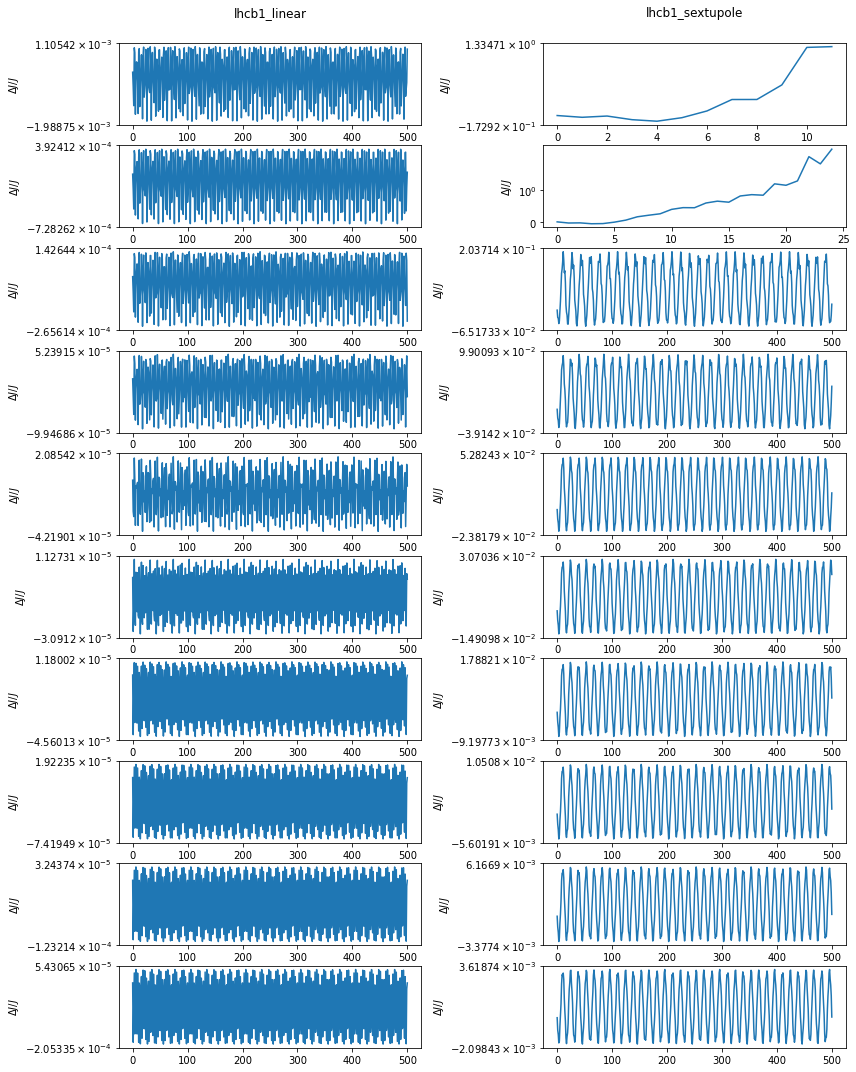

In [ ]:
# Plotting increase in action
fig,axes = plt.subplots(1,2,figsize=(12,15))
for seq,ax in zip(sequenceNames,axes):
    _grouped = summary[(summary['sequence'].str.fullmatch(seq))].groupby('number')
    plt.sca(ax)
    plt.title(seq)
    
    y0 = 0
    plt.axis('off')
    #plt
    for gr in list(_grouped.groups.keys()):
        x,px = np.array(_grouped.get_group(gr)[f'{plane}']),np.array(_grouped.get_group(gr)[f'p{plane}'])
        J_x = BP.getAction(x,px,twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0])
        
        axin = ax.inset_axes([0, y0, 1,0.08])
        y0 += 1/(len(list(_grouped.groups.keys())))

        action = np.sqrt(2*J_x)/LHC_1sigma
        axin.plot((action-action[0])/action[0])
        axin.set_yscale('symlog')
        axin.set_ylabel(r'$\Delta J/J$')
        #axin.set_ylim([-4,4])

        
    #plt.yscale('log')
    plt.xlabel(f'{plane} plane  '+r'Turn')
    plt.ylabel(f'{plane} plane  '+r'$J_x$')

    #plt.xlim([-100,100])
    #plt.ylim([-100,100])
    
plt.tight_layout()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


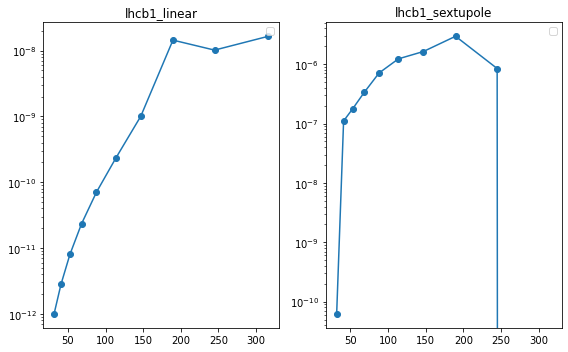

In [129]:
# Plotting increase in action
LHC_1sigma =  np.sqrt(2.5e-6/(1+ mad.sequence[seq].beam.energy/mad.globals.pmass))
fig,axes = plt.subplots(1,2,figsize=(8,5))
for seq,ax in zip(sequenceNames,axes):
    _grouped = summary[(summary['sequence'].str.fullmatch(seq))].groupby('number')
    plt.sca(ax)
    plt.title(seq)
    rate = []
    J0 = []
    for gr in list(_grouped.groups.keys()):
        x,px = np.array(_grouped.get_group(gr)[f'{plane}']),np.array(_grouped.get_group(gr)[f'p{plane}'])
        J_x = BP.getAction(x,px,twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0])
        
        rate.append((np.max(J_x[~np.isnan(J_x)])-np.min(J_x[~np.isnan(J_x)]))/np.max(_grouped.get_group(gr)['turn'])) 
        J0.append(J_x[0])
    
    plt.plot(np.sqrt(2*np.array(J0))/LHC_1sigma,rate,'-o')
    plt.yscale('log')
    #plt.xlabel(f'{plane} plane  '+r'Turn')
    #plt.ylabel(f'{plane} plane  '+r'$J_x$')
    plt.legend()
    #plt.xlim([-100,100])
    #plt.ylim([-100,100])
    
plt.tight_layout()

In [11]:
plt.figuresummary

ID         sequence  number    turn         x  \
0        (lhcb1_linear, 1.0)     lhcb1_linear     1.0     0.0  0.000203   
1        (lhcb1_linear, 2.0)     lhcb1_linear     2.0     0.0  0.000641   
2        (lhcb1_linear, 3.0)     lhcb1_linear     3.0     0.0  0.002026   
3        (lhcb1_linear, 4.0)     lhcb1_linear     4.0     0.0  0.006408   
4        (lhcb1_linear, 5.0)     lhcb1_linear     5.0     0.0  0.020265   
...                      ...              ...     ...     ...       ...   
9022  (lhcb1_sextupole, 4.0)  lhcb1_sextupole     4.0   999.0 -0.000141   
9023  (lhcb1_sextupole, 1.0)  lhcb1_sextupole     1.0  1000.0  0.000093   
9024  (lhcb1_sextupole, 2.0)  lhcb1_sextupole     2.0  1000.0  0.000271   
9025  (lhcb1_sextupole, 3.0)  lhcb1_sextupole     3.0  1000.0  0.000115   
9026  (lhcb1_sextupole, 4.0)  lhcb1_sextupole     4.0  1000.0  0.006386   

            px    y   py         t   pt           s    e  
0    -0.000004  0.0  0.0  1.500000  0.0      0.0000  0.0  
1    -0.000013  0.0  0.0  1.500000  0.0      0.0000  0.0  
2    -0.000040  0.0  0.0  1.500000  0.0      0.0000  0.0  
3    -0.000126  0.0  0.0  1.500000  0.0      0.0000  0.0  
4    -0.000400  0.0  0.0  1.500000  0.0      0.0000  0.0  
...        ...  ...  ...       ...  ...         ...  ...  
9022  0.000056  0.0  0.0  1.512653  0.0  26658.8832  0.0  
9023 -0.000003  0.0  0.0  1.500012  0.0  26658.8832  0.0  
9024 -0.000010  0.0  0.0  1.500129  0.0  26658.8832  0.0  
9025 -0.000019  0.0  0.0  1.501306  0.0  26658.8832  0.0  
9026 -0.000125  0.0  0.0  1.512833  0.0  26658.8832  0.0  

[9027 rows x 12 columns]

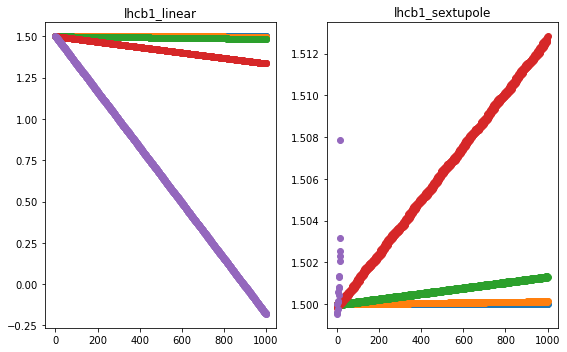

In [146]:
# Plotting increase in action
fig,axes = plt.subplots(1,2,figsize=(8,5))
for seq,ax in zip(sequenceNames,axes):
    _grouped = summary[(summary['sequence'].str.fullmatch(seq))].groupby('number')
    plt.sca(ax)
    plt.title(seq)
    for gr in list(_grouped.groups.keys()):
        t_var = np.array(_grouped.get_group(gr)[f't'])
        #J_x = BP.getAction(x,px,twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0])
        
        plt.plot(t_var,'o',label=f'ID {gr}')
    #plt.yscale('log')
    #plt.xlabel(f'Turn',fontsize=16)
    #plt.ylabel(r'Amplitude $[\sigma] \quad \left(\frac{\sqrt{2J_x}}{\sqrt{2.5\times 10^{-6}/\gamma}}\right)$',fontsize=16)
    #plt.legend()
    #plt.xlim([-100,100])
    #plt.ylim([-1,110])
    
plt.tight_layout()

In [139]:
t

(array([ 0.00000000e+00, -3.99960886e-04, -4.76152901e-04, -2.35832187e-04,
         5.89027848e-04,  1.27252462e-04,  8.71228322e-05,  4.42146912e-04,
         1.29494954e-03,  7.71015132e-04,  8.04364584e-04,  1.35663607e-03,
         2.56244125e-03,  2.04442045e-03,  2.30807515e-03,  3.18081574e-03,
         7.85315300e-03,             nan]),)

In [37]:
np.array(J0)*(1+ mad.sequence[seq].beam.energy/mad.globals.pmass)

np.sqrt(2.5e-6/(1+ mad.sequence[seq].beam.energy/mad.globals.pmass))

array([0.0017    , 0.00171633, 0.00173265, 0.00174898, 0.00176531,
       0.00178163, 0.00179796, 0.00181429, 0.00183061, 0.00184694,
       0.00186327, 0.00187959, 0.00189592, 0.00191224, 0.00192857,
       0.0019449 , 0.00196122, 0.00197755, 0.00199388, 0.0020102 ,
       0.00202653, 0.00204286, 0.00205918, 0.00207551, 0.00209184,
       0.00210816, 0.00212449, 0.00214082, 0.00215714, 0.00217347,
       0.0021898 , 0.00220612, 0.00222245, 0.00223878, 0.0022551 ,
       0.00227143, 0.00228776, 0.00230408, 0.00232041, 0.00233673,
       0.00235306, 0.00236939, 0.00238571, 0.00240204, 0.00241837,
       0.00243469, 0.00245102, 0.00246735, 0.00248367, 0.0025    ])

In [20]:
_grouped = summary[(summary['sequence'].str.fullmatch(seq))].groupby('number')

ID = 11

_grouped.get_group(ID)

ID         sequence  number   turn         x  \
20030  (lhcb1_sextupole, 11.0)  lhcb1_sextupole    11.0    0.0  0.007611   
20050  (lhcb1_sextupole, 11.0)  lhcb1_sextupole    11.0    1.0 -0.000030   
20070  (lhcb1_sextupole, 11.0)  lhcb1_sextupole    11.0    2.0 -0.007746   
20090  (lhcb1_sextupole, 11.0)  lhcb1_sextupole    11.0    3.0 -0.000359   
20110  (lhcb1_sextupole, 11.0)  lhcb1_sextupole    11.0    4.0  0.007450   
...                        ...              ...     ...    ...       ...   
24694  (lhcb1_sextupole, 11.0)  lhcb1_sextupole    11.0  258.0 -0.026535   
24705  (lhcb1_sextupole, 11.0)  lhcb1_sextupole    11.0  259.0 -0.030228   
24716  (lhcb1_sextupole, 11.0)  lhcb1_sextupole    11.0  260.0  0.023958   
24727  (lhcb1_sextupole, 11.0)  lhcb1_sextupole    11.0  261.0  0.039523   
24738  (lhcb1_sextupole, 11.0)  lhcb1_sextupole    11.0  262.0       NaN   

             px    y   py         t   pt           s    e  
20030 -0.000150  0.0  0.0  0.000000  0.0      0.0000  0.0  
20050 -0.000061  0.0  0.0 -0.000113  0.0  26658.8832  0.0  
20070  0.000151  0.0  0.0 -0.000231  0.0  26658.8832  0.0  
20090  0.000070  0.0  0.0 -0.000148  0.0  26658.8832  0.0  
20110 -0.000145  0.0  0.0  0.000073  0.0  26658.8832  0.0  
...         ...  ...  ...       ...  ...         ...  ...  
24694  0.000331  0.0  0.0  0.008841  0.0  26658.8832  0.0  
24705  0.000796  0.0  0.0  0.009100  0.0  26658.8832  0.0  
24716 -0.000139  0.0  0.0  0.009999  0.0  26658.8832  0.0  
24727 -0.001168  0.0  0.0  0.014445  0.0  26658.8832  0.0  
24738       NaN  NaN  NaN       NaN  0.0  26658.8832  0.0  

[263 rows x 12 columns]

### XSuite

  0%|          | 0/2 [00:00<?, ?it/s]

generating ./e4542e919eb149bc97a80b741a5e1237.c
the current directory is '/home/pbelange/LHC_testbench'
running build_ext
building 'e4542e919eb149bc97a80b741a5e1237' extension
gcc -pthread -B /home/pbelange/Apps/miniconda3/compiler_compat -Wl,--sysroot=/ -Wno-unused-result -Wsign-compare -DNDEBUG -O2 -Wall -fPIC -O2 -isystem /home/pbelange/Apps/miniconda3/include -fPIC -O2 -isystem /home/pbelange/Apps/miniconda3/include -fPIC -I/home/pbelange/Apps/miniconda3/include/python3.9 -c e4542e919eb149bc97a80b741a5e1237.c -o ./e4542e919eb149bc97a80b741a5e1237.o -std=c99 -O3 -Wno-unused-function
gcc -pthread -B /home/pbelange/Apps/miniconda3/compiler_compat -Wl,--sysroot=/ -shared -Wl,-rpath,/home/pbelange/Apps/miniconda3/lib -Wl,-rpath-link,/home/pbelange/Apps/miniconda3/lib -L/home/pbelange/Apps/miniconda3/lib -Wl,-rpath,/home/pbelange/Apps/miniconda3/lib -Wl,-rpath-link,/home/pbelange/Apps/miniconda3/lib -L/home/pbelange/Apps/miniconda3/lib ./e4542e919eb149bc97a80b741a5e1237.o -o ./e4542e919e

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
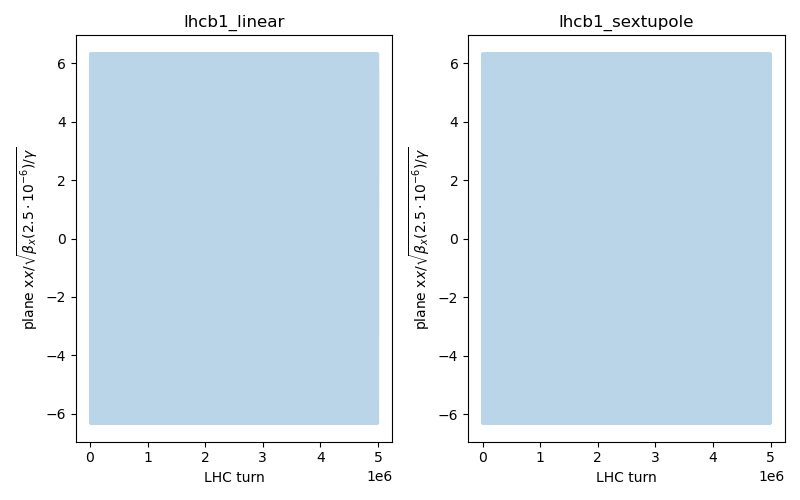

In [21]:
import itertools as itertools
from tqdm.notebook import tqdm
import xline as xl
import xobjects as xo
import xtrack as xt
import xpart as xp


sequenceNames = ['lhcb1_linear','lhcb1_sextupole']

# Importing LHC sequence :
#===========================================
mad = Madx()
mad.option(echo = True, warn = True)
for seq in sequenceNames:
    mad.call(file=f'{seq}.seq')
    
# Applying optics
mad.call(file='/afs/cern.ch/eng/lhc/optics/lhc_current/opt_400_10000_400_3000.madx')
# Adding beam 
mad.command.beam(particle='proton',charge=1,npart=1,energy=7000)
#===========================================

plane = 'x'
summary = pd.DataFrame()
for seq in tqdm(sequenceNames):
    # Sending sequence to xsuite
    mad.input(f'''use, sequence = {seq}; 
                select,flag=makethin,slice=2,range=#s/#e;
                makethin,sequence = {seq};''')
    
    mad.sequence[seq].use()
    mad.twiss()
    twiss = mad.table['twiss'].dframe()
    #in y
    #alfMin = np.argsort(np.abs(twiss[f'alf{plane}'][twiss['keyword']!='drift']))[2]
    
    #in x
    alfMin = np.argmin(np.abs(twiss['alfx'][twiss['keyword']!='drift']))
    alfMinLoc = twiss[twiss['keyword']!='drift'].index[alfMin]
    
    mad.input(f'''  SEQEDIT, SEQUENCE={seq};
                    FLATTEN;
                        CYCLE, START={alfMinLoc};
                    FLATTEN;
                    ENDEDIT;''')
    
    mad.sequence[seq].use()
    mad.twiss()
    twiss = mad.table['twiss'].dframe()
    
    
   
    NParticles = 1
    
    coordinates = pd.DataFrame()
    for Jx_n,PT in itertools.product(*[[50e-6],[0]]):
        Jx = Jx_n/(1+ mad.sequence[seq].beam.energy/mad.globals.pmass)
        coordinates = pd.concat([coordinates,generateCoord(Jx,twiss[f'alf{plane}'][0],twiss[f'bet{plane}'][0],NParticles,PT = PT,plane=plane)])

    
    
    
    #=============
    
    xsequence = xl.Line.from_madx_sequence(mad.sequence[seq])
    context = xo.ContextCpu()

    # Setting up the tracker
    tracker = xt.Tracker(_context=context,sequence=xsequence)
    particles = xt.Particles(_context=context,
                            p0c=mad.sequence[seq].beam.pc*1e9,
                            x=coordinates['x'],
                            px=coordinates['px'],
                            pt = coordinates['pt']
                            )

    

    ## Track (saving turn-by-turn data)
    n_turns = int(5e6)
    tracker.track(particles, num_turns=n_turns,turn_by_turn_monitor=True)
    
    #================
    
    #CONVERT TO PANDAS
    tracked = pd.DataFrame(tracker.record_last_track.to_dict()['data'])
    tracked = tracked[['at_turn','particle_id','x','px','y','py','zeta','delta']]
    tracked.rename(columns={"at_turn": "turn",'particle_id':'number', "zeta": "t", "delta": "pt"},inplace=True)

    #Summary
    tracked.insert(0,'sequence',seq)
    tracked.insert(0,'ID',list(zip(tracked['sequence'],tracked['number']))) 
    summary = pd.concat([summary,tracked])
    summary.reset_index(inplace=True,drop=True)

    
# Plotting Normalised phase space
LHC_1sigma = 2.5e-6/(1+ mad.sequence[seq].beam.energy/mad.globals.pmass)


fig,axes = plt.subplots(1,2,figsize=(8,5))
for seq,ax in zip(sequenceNames,axes):
    _grouped = summary[(summary['sequence'].str.fullmatch(seq))].groupby('pt')
    plt.sca(ax)
    plt.title(seq)
    for gr in list(_grouped.groups.keys()):
        plt.plot(_grouped.get_group(gr)['turn'],_grouped.get_group(gr)[plane]/np.sqrt(twiss[f'bet{plane}'][0]*LHC_1sigma),'-',alpha=0.3,)
    plt.ylabel(f'plane {plane}' + r'$x/\sqrt{\beta_x (2.5\cdot 10^{-6})/\gamma}$')
    plt.xlabel(r'LHC turn')

plt.tight_layout()

In [13]:
summary

ID         sequence  turn  number         x  \
0        (lhcb1_linear, 0)     lhcb1_linear     0       0  0.000660   
1        (lhcb1_linear, 0)     lhcb1_linear     1       0  0.000012   
2        (lhcb1_linear, 0)     lhcb1_linear     2       0 -0.000659   
3        (lhcb1_linear, 0)     lhcb1_linear     3       0 -0.000035   
4        (lhcb1_linear, 0)     lhcb1_linear     4       0  0.000658   
...                    ...              ...   ...     ...       ...   
1995  (lhcb1_sextupole, 0)  lhcb1_sextupole   995       0  0.000643   
1996  (lhcb1_sextupole, 0)  lhcb1_sextupole   996       0  0.000162   
1997  (lhcb1_sextupole, 0)  lhcb1_sextupole   997       0 -0.000635   
1998  (lhcb1_sextupole, 0)  lhcb1_sextupole   998       0 -0.000196   
1999  (lhcb1_sextupole, 0)  lhcb1_sextupole   999       0  0.000631   

                px    y   py             t   pt  
0     8.398285e-09  0.0  0.0  0.000000e+00  0.0  
1    -2.031105e-05  0.0  0.0 -2.672523e-05  0.0  
2    -7.296999e-07  0.0  0.0 -1.386789e-05  0.0  
3     2.028514e-05  0.0  0.0 -5.834049e-07  0.0  
4     1.450081e-06  0.0  0.0 -2.488366e-05  0.0  
...            ...  ...  ...           ...  ...  
1995  4.806617e-06  0.0  0.0  5.367913e-04  0.0  
1996 -1.973027e-05  0.0  0.0  5.130121e-04  0.0  
1997 -5.535058e-06  0.0  0.0  5.278571e-04  0.0  
1998  1.943818e-05  0.0  0.0  5.519133e-04  0.0  
1999  6.176785e-06  0.0  0.0  5.403116e-04  0.0  

[2000 rows x 10 columns]

In [15]:
LHC_1sigma = 2.5e-6/(1+ mad.sequence[seq].beam.energy/mad.globals.pmass)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
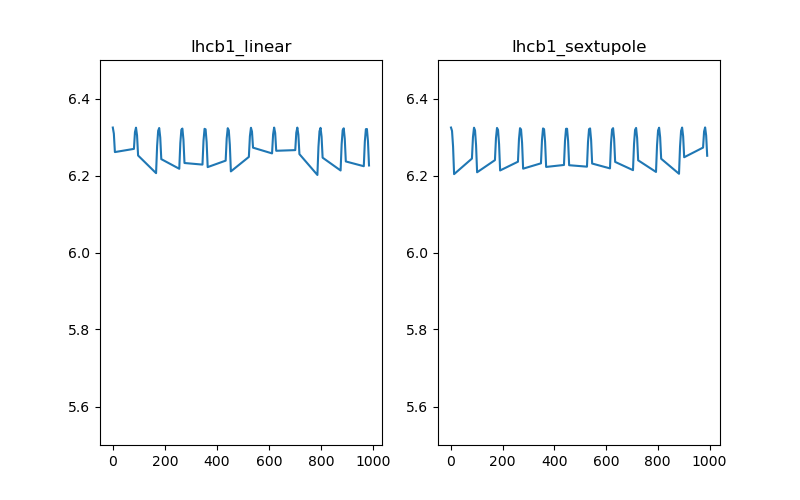

In [16]:
from scipy.signal import hilbert, chirp
%matplotlib widget

fig,axes = plt.subplots(1,2,figsize=(8,5))
for seq,ax in zip(sequenceNames,axes):
    _grouped = summary[(summary['sequence'].str.fullmatch(seq))].groupby('pt')
    plt.sca(ax)
    plt.title(seq)
    for gr in list(_grouped.groups.keys()):
        t = _grouped.get_group(gr)['turn']
        signal = _grouped.get_group(gr)[plane]/np.sqrt(twiss[f'bet{plane}'][0]*LHC_1sigma)
        
        bins = np.arange(t.iloc[0],t.iloc[-1],5000)
        digitized = np.digitize(t,bins)
        bin_max = np.array([signal[digitized == i].max() for i in range(1, len(bins))])
        bin_times = bins[:-1] + np.diff(bins)/2
        
        plt.plot(t[signal>6.2], signal[signal>6.2], label='envelope')
    #plt.ylabel(f'plane {plane}' + r'$x/\sqrt{\beta_x (2.5\cdot 10^{-6})/\gamma}$')
    #plt.xlabel(r'LHC turn')
    plt.ylim([5.5,6.5])
    
    


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
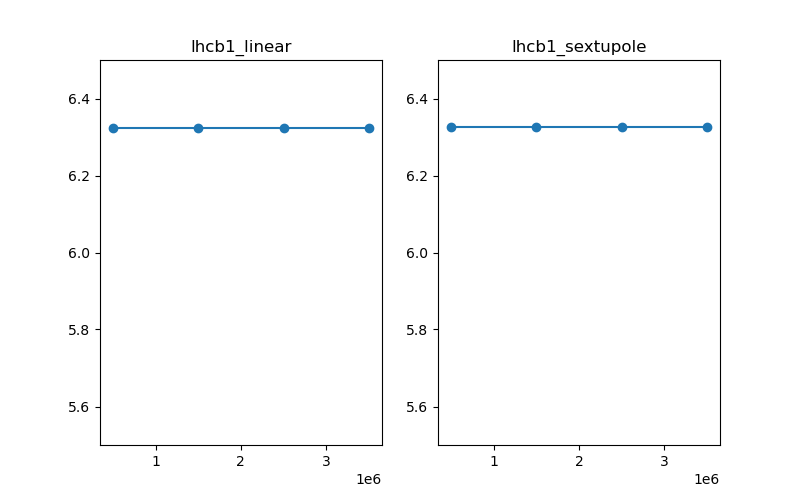

In [26]:
from scipy.signal import hilbert, chirp
%matplotlib widget

fig,axes = plt.subplots(1,2,figsize=(8,5))
for seq,ax in zip(sequenceNames,axes):
    _grouped = summary[(summary['sequence'].str.fullmatch(seq))].groupby('pt')
    plt.sca(ax)
    plt.title(seq)
    for gr in list(_grouped.groups.keys()):
        t = _grouped.get_group(gr)['turn']
        signal = _grouped.get_group(gr)[plane]/np.sqrt(twiss[f'bet{plane}'][0]*LHC_1sigma)
        
        bins = np.arange(t.iloc[0],t.iloc[-1],1000000)
        digitized = np.digitize(t,bins)
        bin_max = np.array([signal[digitized == i].max() for i in range(1, len(bins))])
        bin_times = bins[:-1] + np.diff(bins)/2
        
        plt.plot(bin_times,bin_max,'-o')
        #plt.plot(t[signal>6.2], signal[signal>6.2], label='envelope')
    #plt.ylabel(f'plane {plane}' + r'$x/\sqrt{\beta_x (2.5\cdot 10^{-6})/\gamma}$')
    #plt.xlabel(r'LHC turn')
    plt.ylim([5.5,6.5])
    
    

In [9]:
import itertools as itertools
from tqdm.notebook import tqdm
import Backend.BeamPhysics as BP

sequenceNames = ['lhcb1_linear','lhcb1_sextupole']

# Importing LHC sequence :
#===========================================
mad = Madx()
mad.option(echo = True, warn = True)
#for seq in sequenceNames:
#    mad.call(file=f'{seq}.seq')
    
dobrinCall = '''
Option, -echo,-warn,-info;
call,file="lhcb1_linear.seq";
call,file='/afs/cern.ch/eng/lhc/optics/lhc_current/opt_400_10000_400_3000.madx';

Option,  warn,info;
! my BEAM
 NRJ= 7000.0 ; ! collision
Nb:=2.2E11;
EMIT_BEAM:=2.5;
emittance_norm := EMIT_BEAM*1.0E-6;
gamma_rel      := NRJ/pmass;
epsx:=emittance_norm /gamma_rel;
epsy:=emittance_norm /gamma_rel;
value,gamma_rel,emittance_norm ;
Nb_0:=0;

  Beam,particle=proton,sequence=lhcb1_linear,energy=NRJ,sigt=0.130,bv=1,NPART=Nb_0,sige=4.5e-4,ex=epsx,ey=epsy;

  Use, sequence=lhcb1_linear;
 select,flag=twiss,clear;
  select, flag=twiss, pattern="IP1",   column=name,s,betx,bety,alfx,alfy,dx,dpx,mux,muy;
  select, flag=twiss, pattern="IP2",   column=name,s,betx,bety,alfx,alfy,dx,dpx,mux,muy;
  select, flag=twiss, pattern="IP5",   column=name,s,betx,bety,alfx,alfy,dx,dpx,mux,muy;
  select, flag=twiss, pattern="IP8",   column=name,s,betx,bety,alfx,alfy,dx,dpx,mux,muy;
SETPLOT,POST=1,FONT=4,ASCALE=1.,LSCALE=1.,SSCALE=1.,RSCALE=1.5;
PLOT,STYLE=100,colour=100,range=#s/#e,HAXIS=S,VAXIS1=BETX,BETY,VAXIS2=DX,
NOLINE=false,HMIN=0.,HMAX=3;
  twiss,sequence=lhcb1_linear,file=twiss.b1;system,"cat twiss.b1";'''

mad.input(dobrinCall)
mad.input(' select, flag=twiss,    column=name,k1L,,mux,muy;')

True

In [7]:
mad.table['twiss'].dframe()

name     keyword           s         betx  \
#s             lhcb1_linear$start:1      marker      0.0000  3354.545817   
ip1                           ip1:1      marker      0.0000  3354.545817   
drift_0[0]                drift_0:0       drift     22.9650  3354.702687   
mqxa.1r1                 mqxa.1r1:1  quadrupole     29.3350  3354.801904   
drift_1[0]                drift_1:0       drift     32.0500  3354.851545   
...                             ...         ...         ...          ...   
drift_2209[0]          drift_2209:0       drift  26629.5482  3354.802789   
mqxa.1l1                 mqxa.1l1:1  quadrupole  26635.9182  3354.703380   
drift_2210[0]          drift_2210:0       drift  26658.8832  3354.545817   
ip1.l1                     ip1.l1:1      marker  26658.8832  3354.545817   
#e               lhcb1_linear$end:1      marker  26658.8832  3354.545817   

                   alfx       mux          bety      alfy       muy    x  ...  \
#s             0.000008  0.000000  81426.487624 -0.011704  0.000000  0.0  ...   
ip1            0.000008  0.000000  81426.487624 -0.011704  0.000000  0.0  ...   
drift_0[0]    -0.006838  0.001090  81427.031649 -0.011986  0.000045  0.0  ...   
mqxa.1r1      -0.008737  0.001392  81427.184845 -0.012064  0.000057  0.0  ...   
drift_1[0]    -0.009547  0.001521  81427.250443 -0.012097  0.000063  0.0  ...   
...                 ...       ...           ...       ...       ...  ...  ...   
drift_2209[0]  0.008752  1.230277  81425.811541 -0.011343  0.052147  0.0  ...   
mqxa.1l1       0.006853  1.230579  81425.956554 -0.011422  0.052160  0.0  ...   
drift_2210[0]  0.000008  1.231669  81426.487624 -0.011704  0.052205  0.0  ...   
ip1.l1         0.000008  1.231669  81426.487624 -0.011704  0.052205  0.0  ...   
#e             0.000008  1.231669  81426.487624 -0.011704  0.052205  0.0  ...   

               sig54     sig55  sig56  sig61  sig62  sig63  sig64  sig65  \
#s               0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
ip1              0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
drift_0[0]       0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
mqxa.1r1         0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
drift_1[0]       0.0  0.000000    0.0    0.0    0.0    0.0    0.0    0.0   
...              ...       ...    ...    ...    ...    ...    ...    ...   
drift_2209[0]    0.0  0.000001    0.0    0.0    0.0    0.0    0.0    0.0   
mqxa.1l1         0.0  0.000001    0.0    0.0    0.0    0.0    0.0    0.0   
drift_2210[0]    0.0  0.000001    0.0    0.0    0.0    0.0    0.0    0.0   
ip1.l1           0.0  0.000001    0.0    0.0    0.0    0.0    0.0    0.0   
#e               0.0  0.000001    0.0    0.0    0.0    0.0    0.0    0.0   

               sig66   n1  
#s               0.0  0.0  
ip1              0.0  0.0  
drift_0[0]       0.0  0.0  
mqxa.1r1         0.0  0.0  
drift_1[0]       0.0  0.0  
...              ...  ...  
drift_2209[0]    0.0  0.0  
mqxa.1l1         0.0  0.0  
drift_2210[0]    0.0  0.0  
ip1.l1           0.0  0.0  
#e               0.0  0.0  

[4426 rows x 256 columns]